<a href="https://colab.research.google.com/github/ErickMM98/kaggle-housesprice-colab/blob/main/Kaggle_HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Competition - House Prices - Advanced Regression Techniques

- Tenemos > 70 variables explicativas. 
- **Objetivo:** Dar el precio de la casa en cuestión.

[Link a Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)



## Importamos los datos desde Kaggle por la API

In [4]:
!mkdir ~/.kaggle
#GUARDAR .json EN ALGUNA CARPETA DE DRIVE
!cp /content/drive/MyDrive/TestFolder/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 59.5MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 62.3MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 31.4MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 12.1MB/s]


## Análisis estadístico. 

In [6]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
"""
----- GLOBAL VARIABLES
"""

str_path_test = "/content/test.csv"
str_path_train = "/content/train.csv"

In [7]:
df_test = pd.read_csv(str_path_test)
df_train = pd.read_csv(str_path_train)

Text(0.5, 1.0, 'TEST')

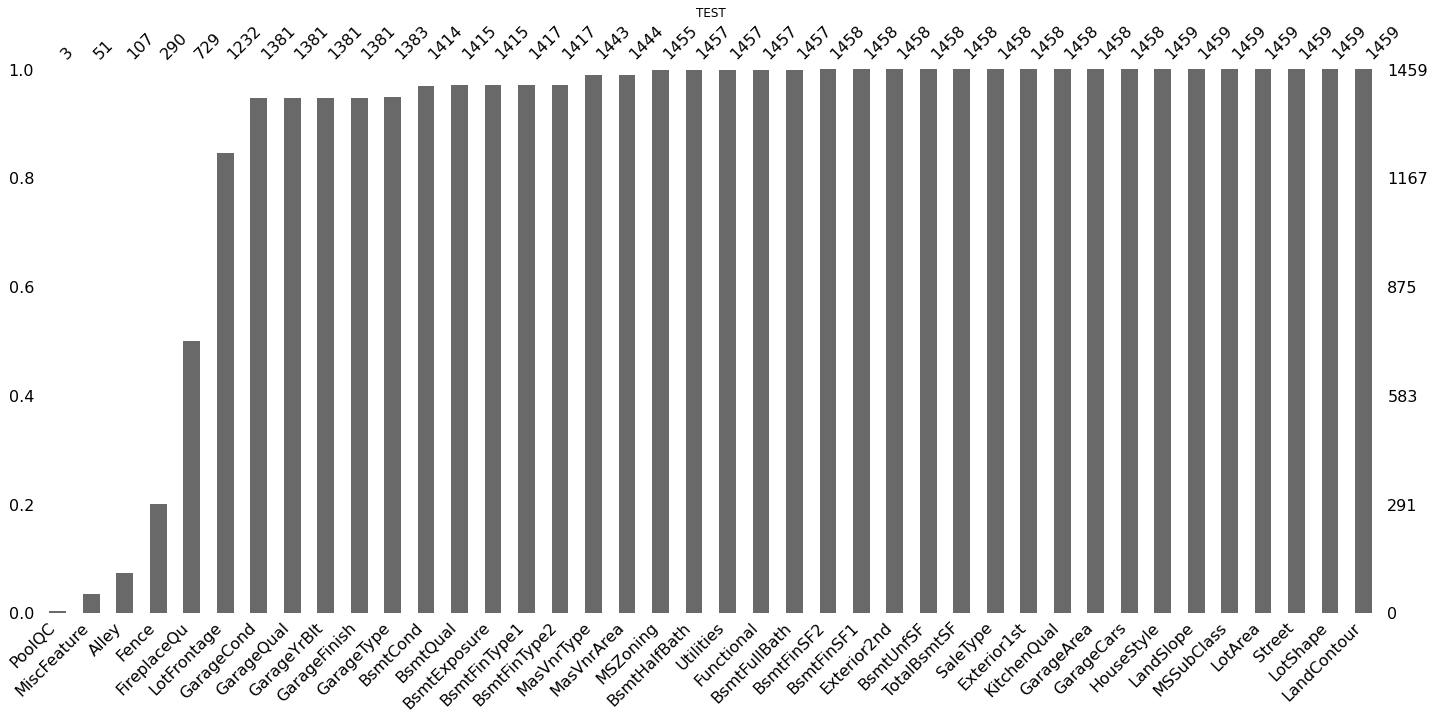

In [8]:
null_var = list(df_test.isna().sum().sort_values(ascending=False).index)[0:40]
#plt.plot(df_test.isna().sum().sort_values(ascending=False))
#df_test.isna().sum().sort_values(ascending=False).head(40)

df_faltantes = df_test[null_var]


msno.bar(df_faltantes)
plt.title("TEST")

Text(0.5, 1.0, 'ENTRENAMIENTOb')

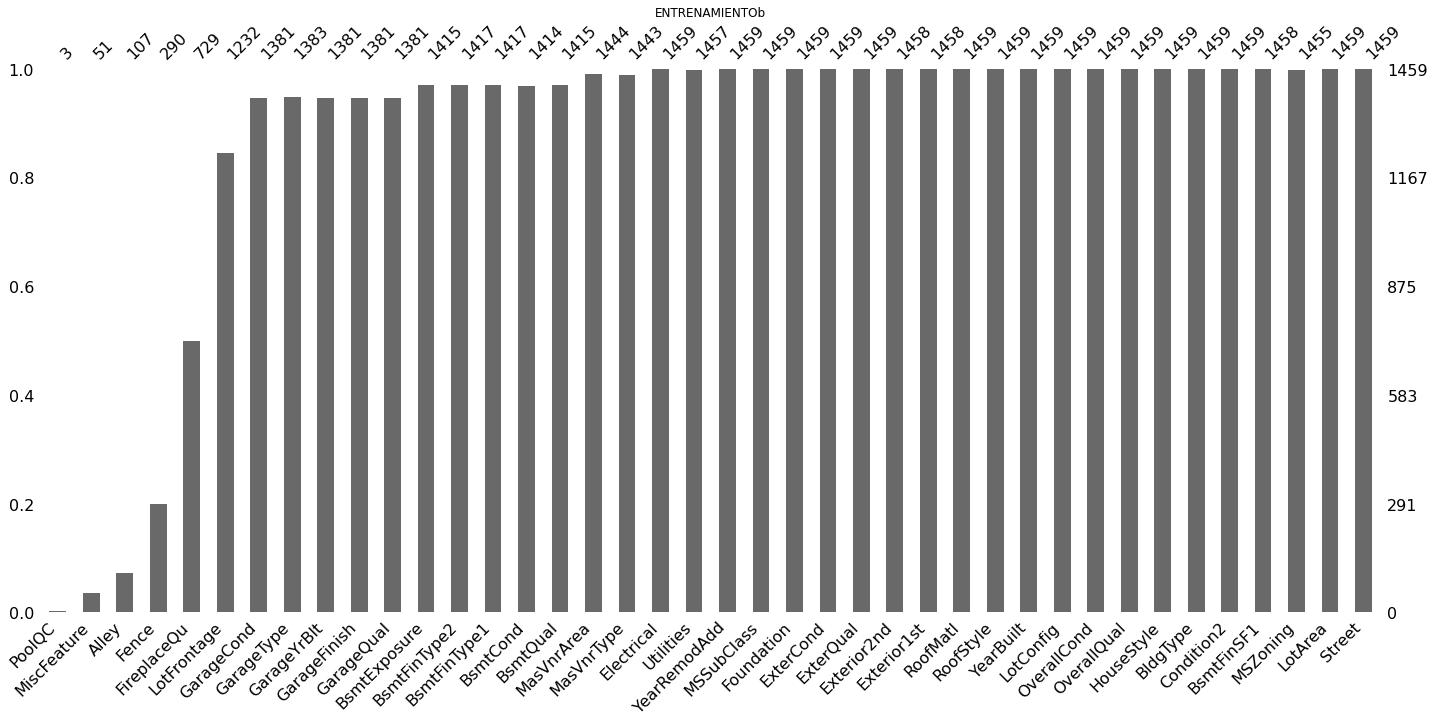

In [9]:
null_var = list(df_train.isna().sum().sort_values(ascending=False).index)[0:40]
#plt.plot(df_test.isna().sum().sort_values(ascending=False))
#df_test.isna().sum().sort_values(ascending=False).head(40)

df_faltantes = df_test[null_var]


msno.bar(df_faltantes)
plt.title("ENTRENAMIENTOb")

## Extraemos los datos de train.csv

### Hagamos un análisis descriptivo de la variable respuesta. 

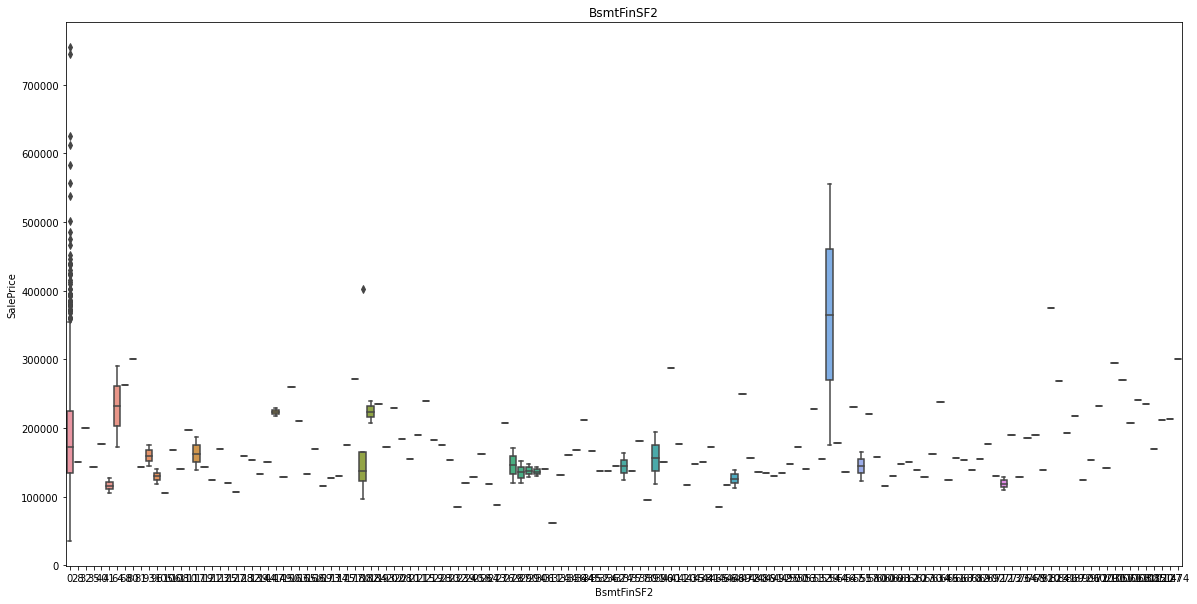

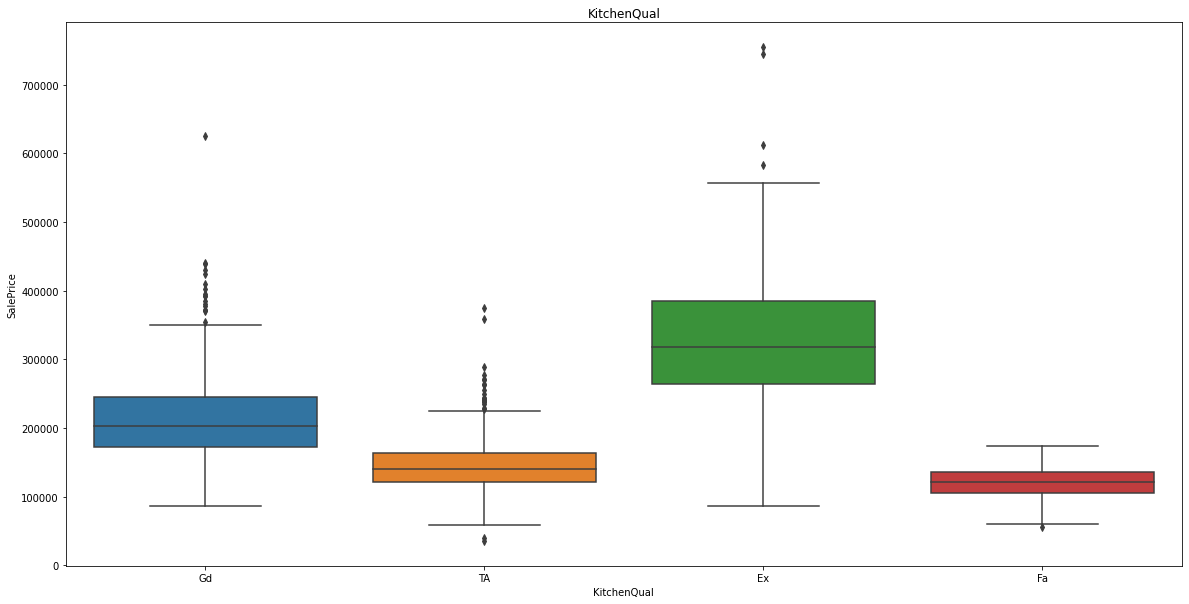

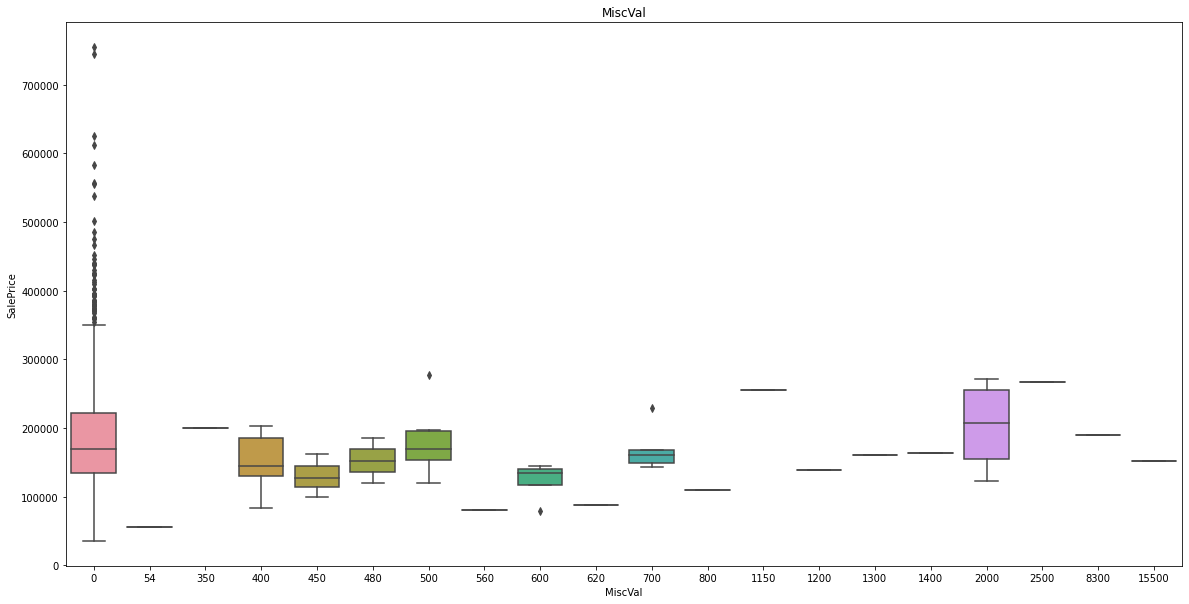

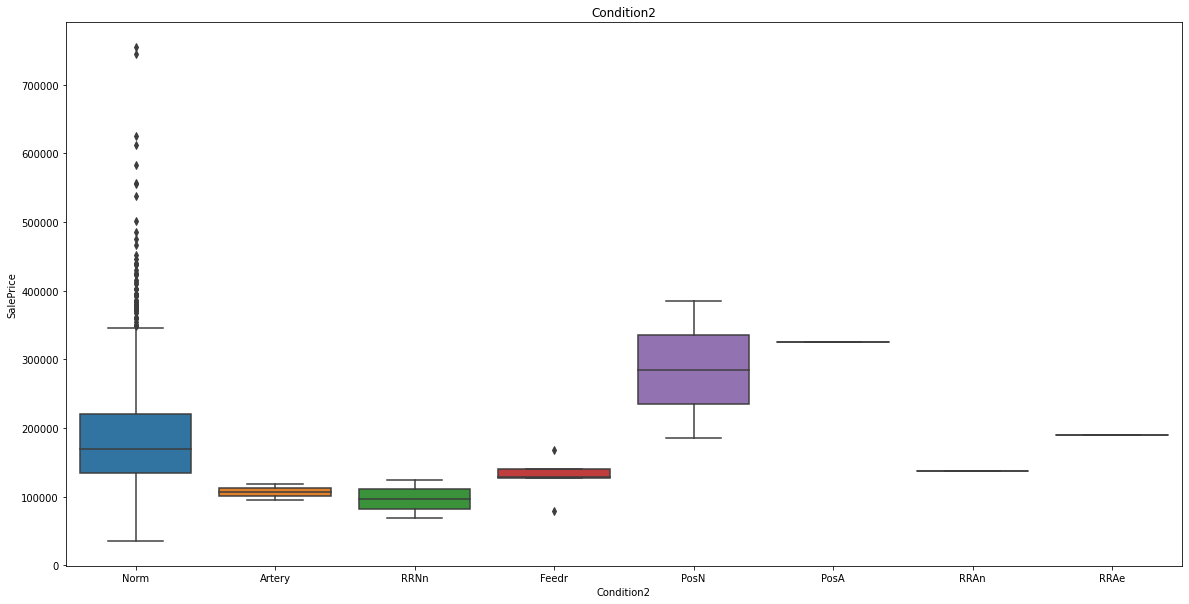

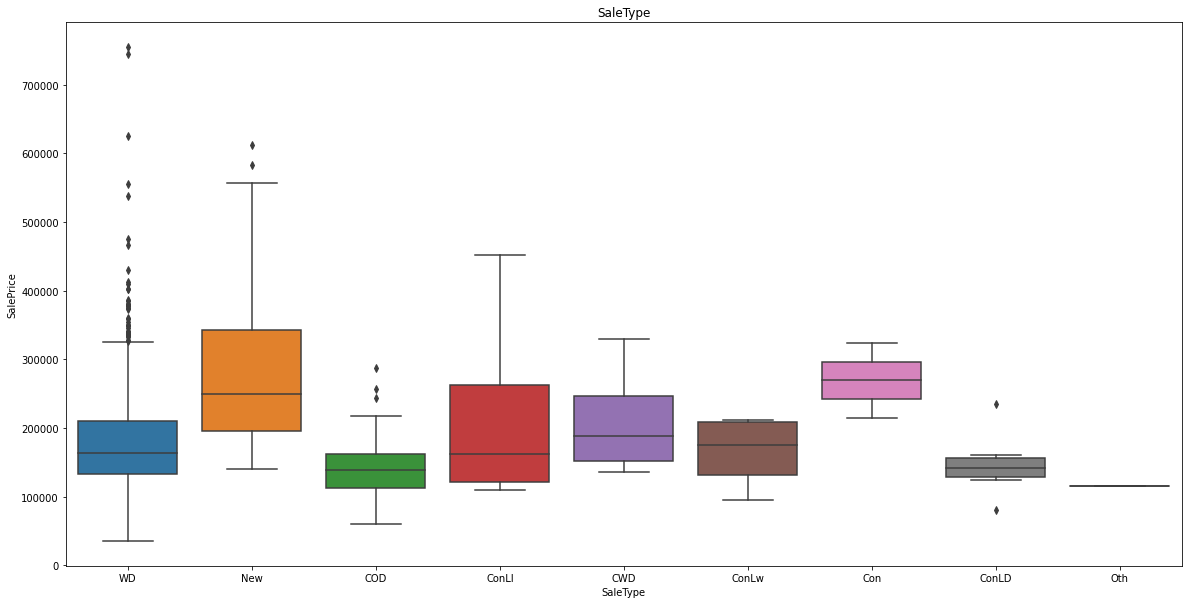

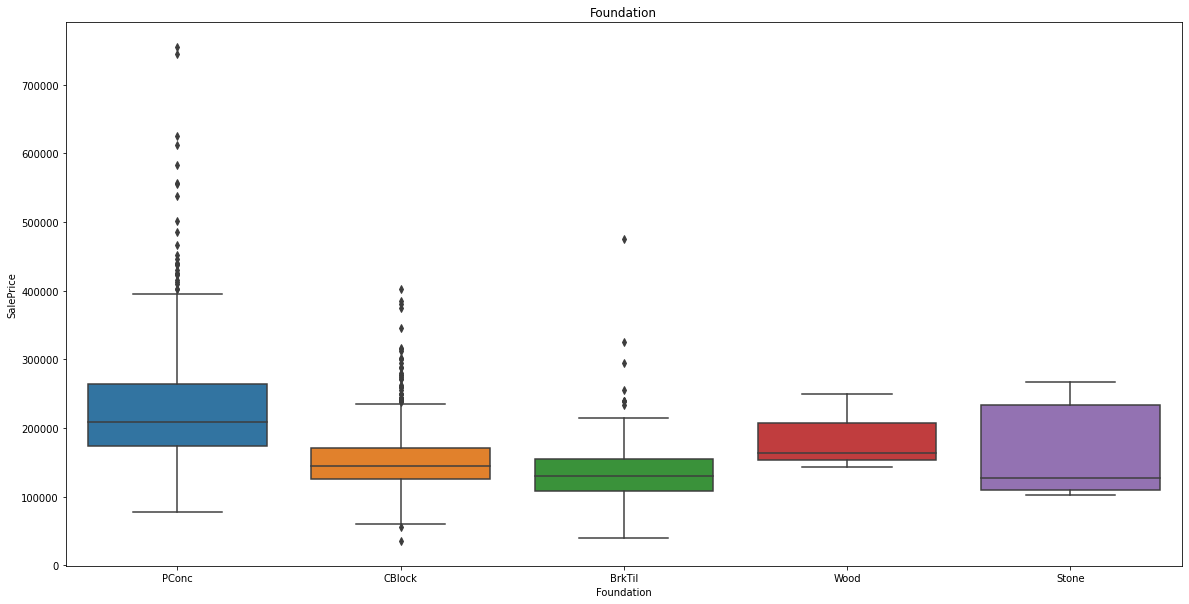

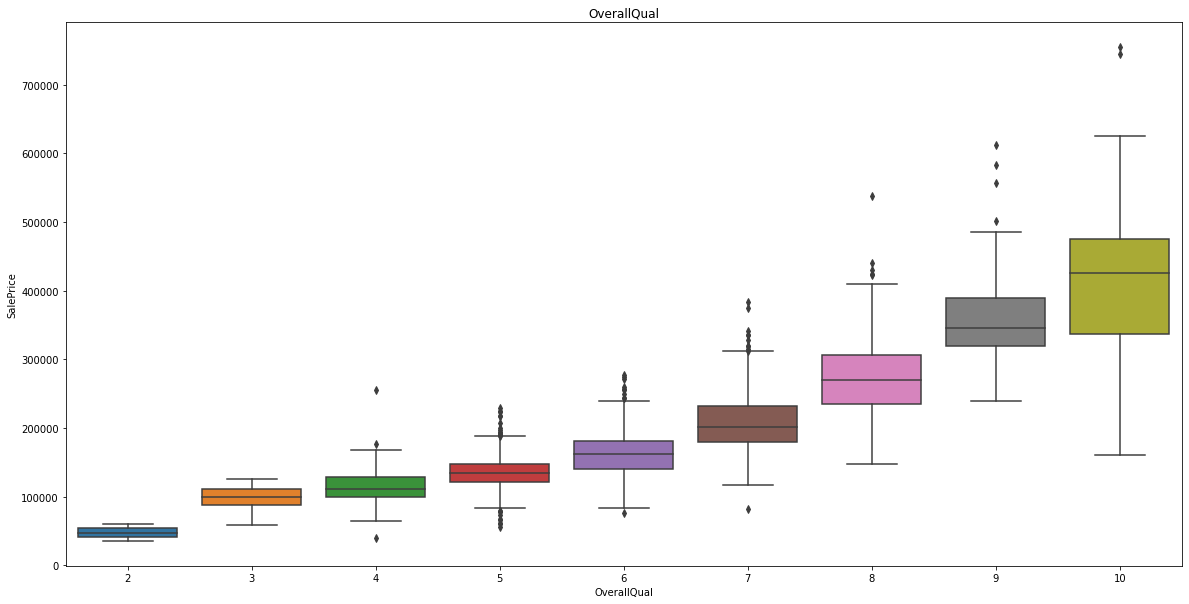

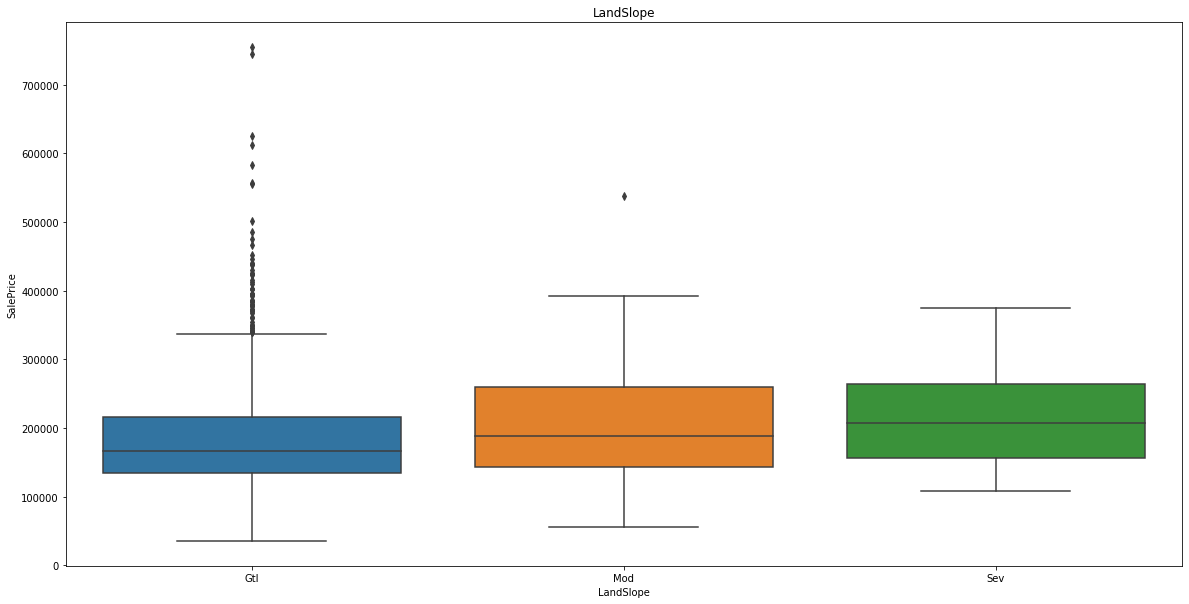

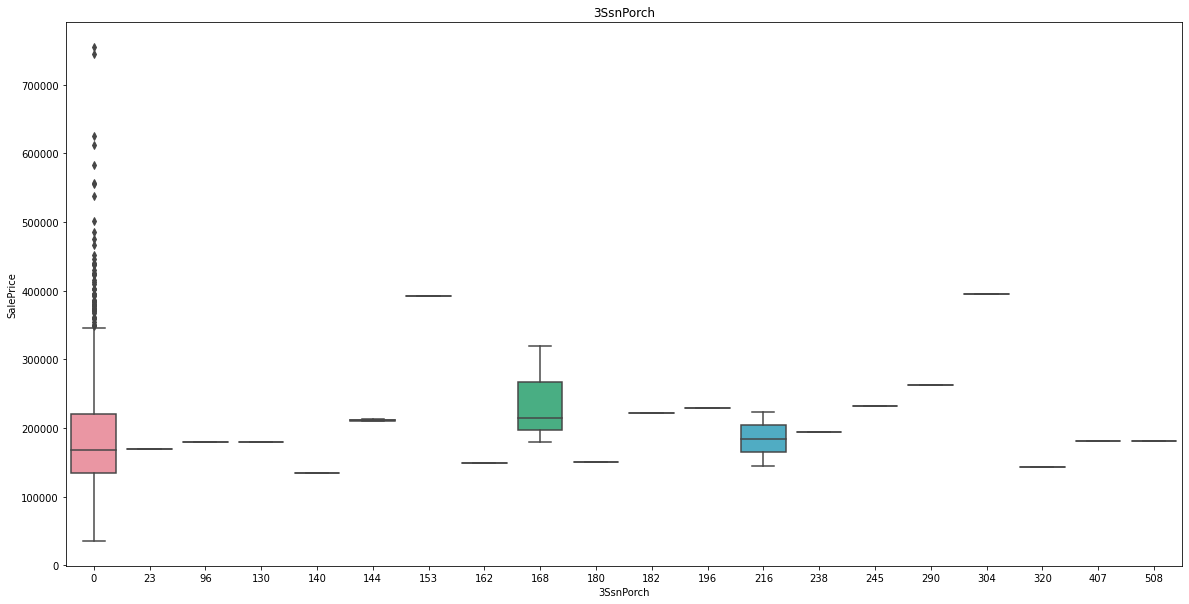

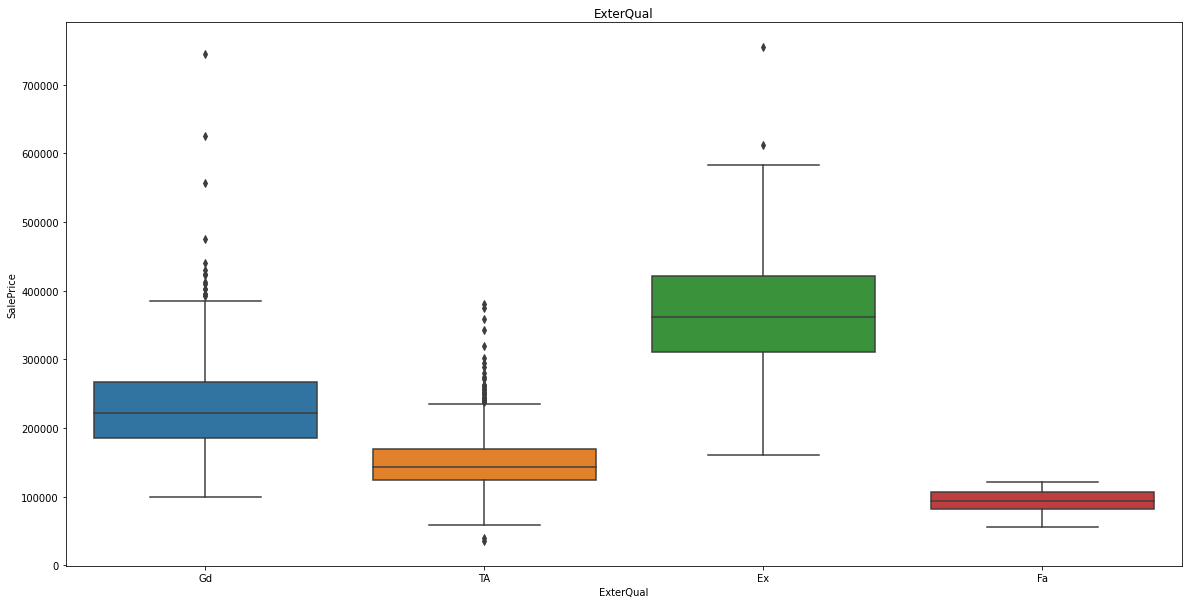

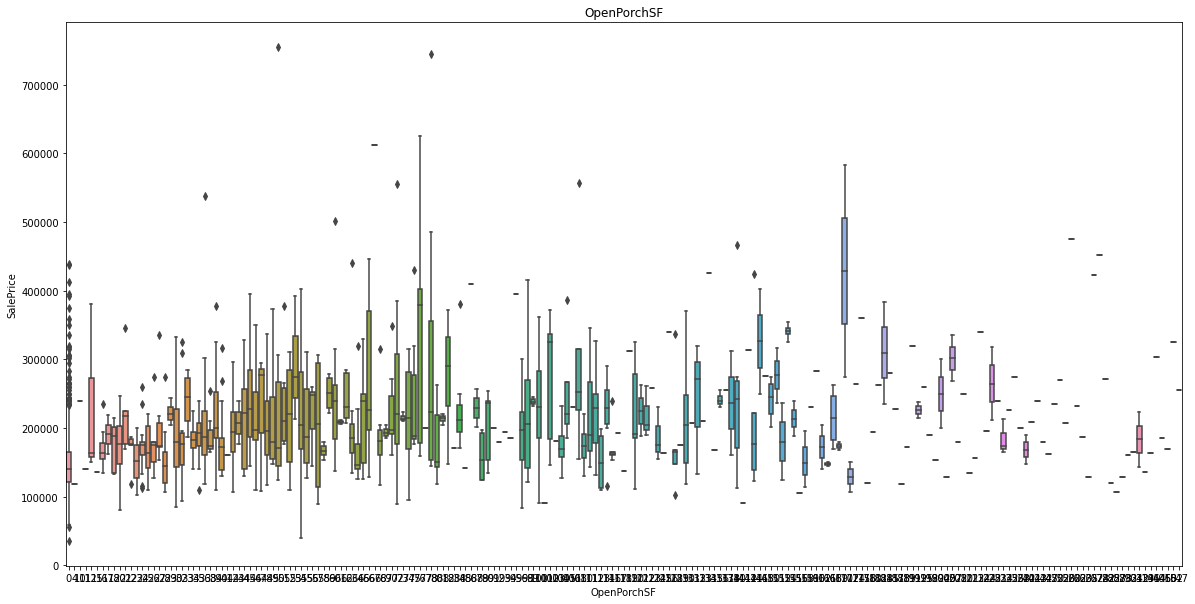

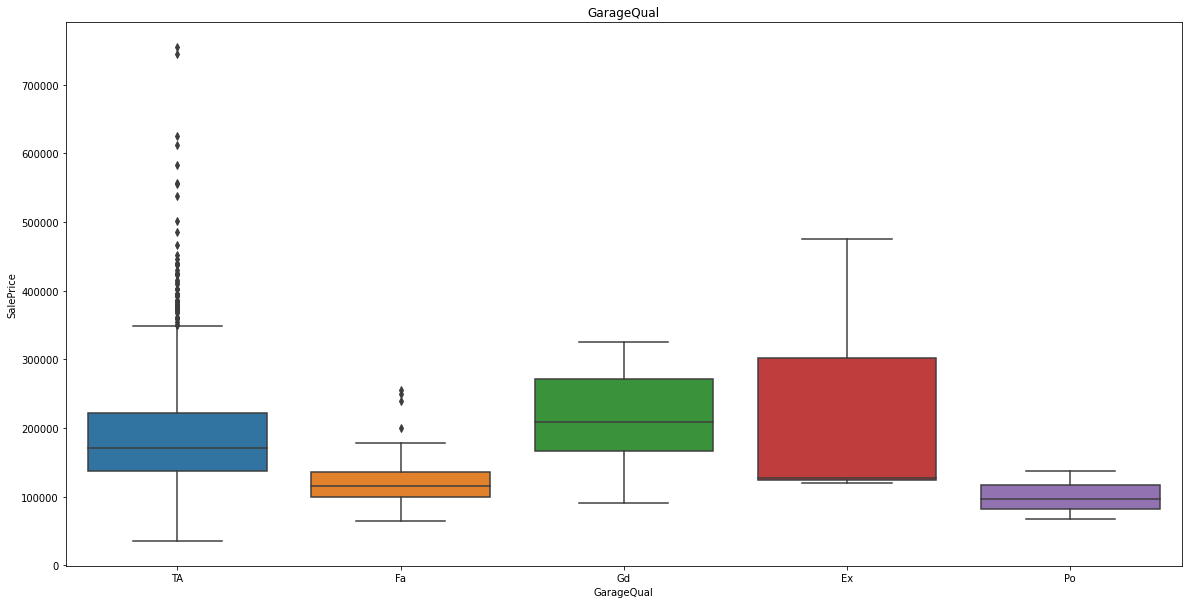

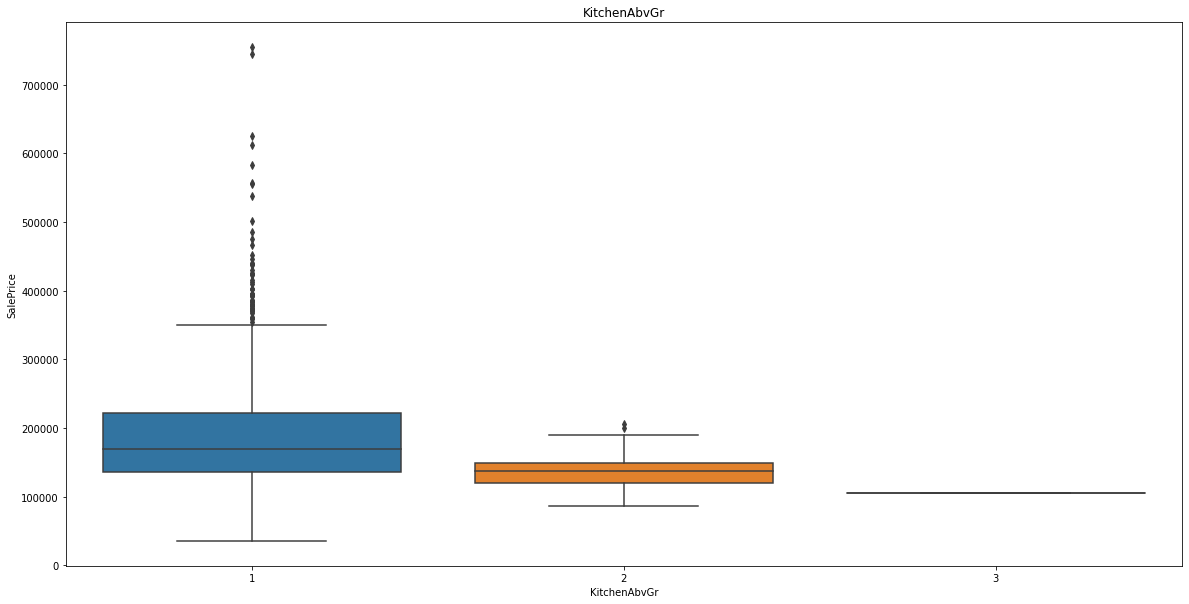

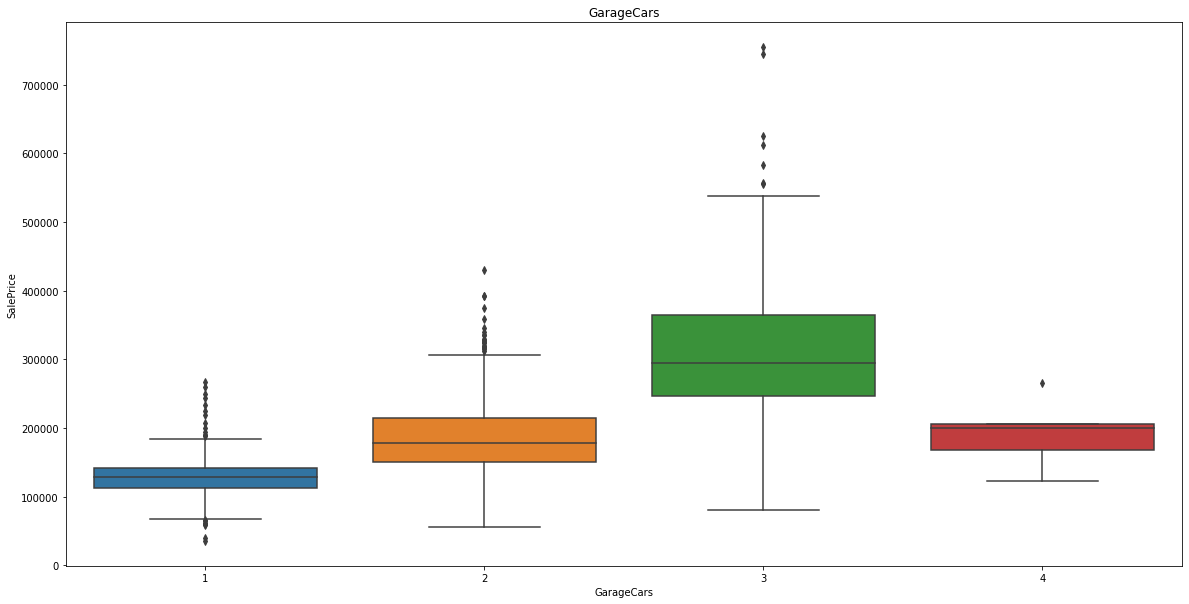

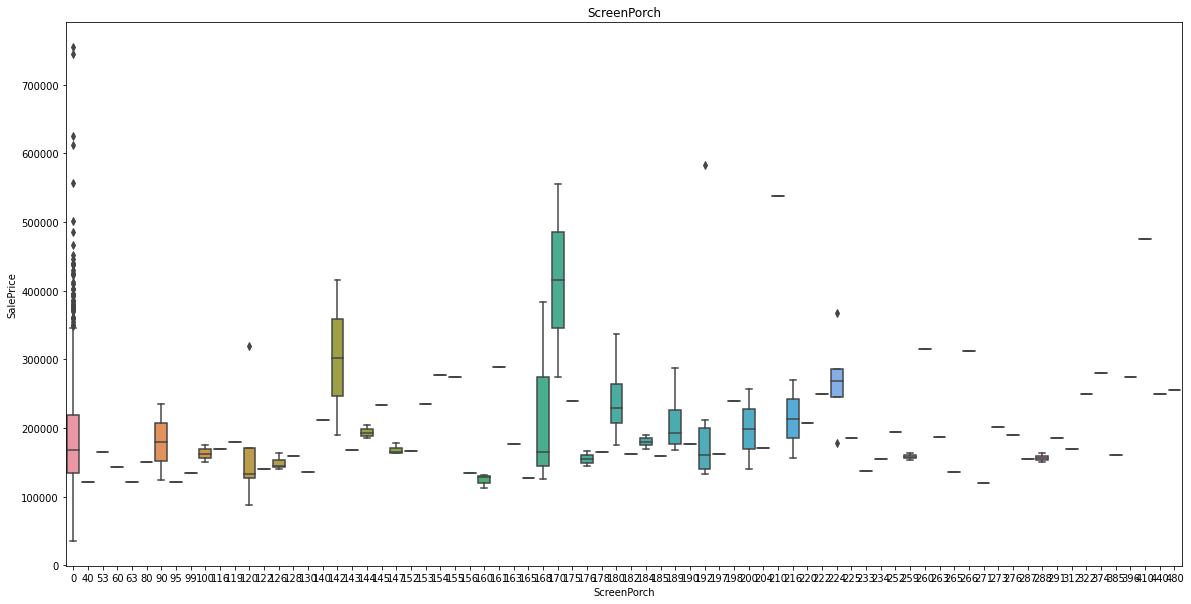

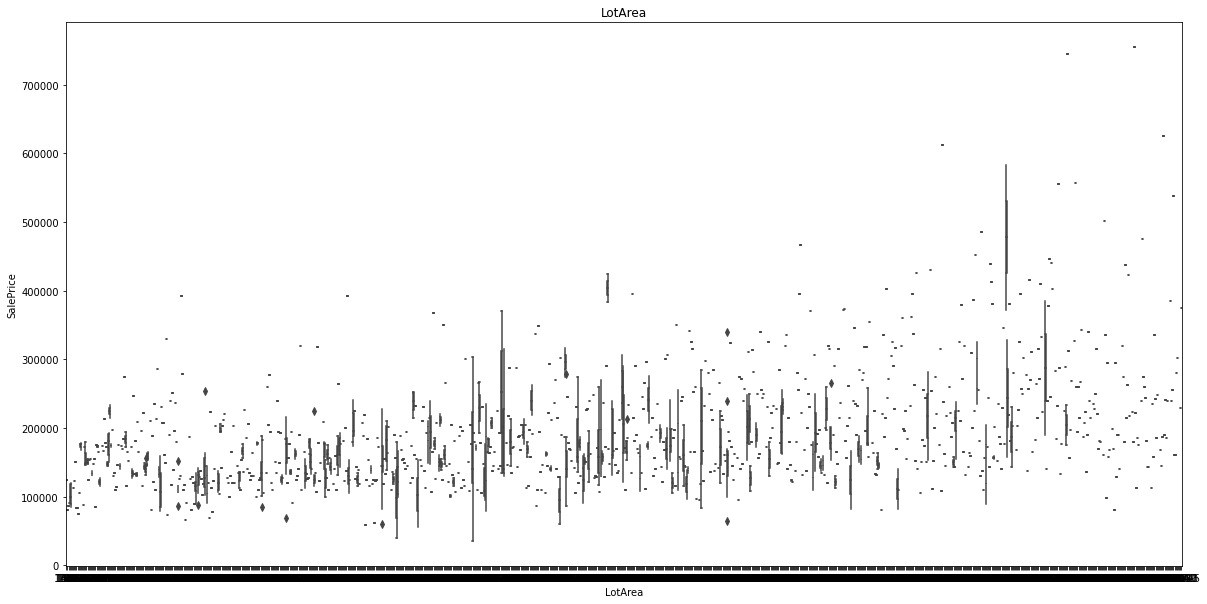

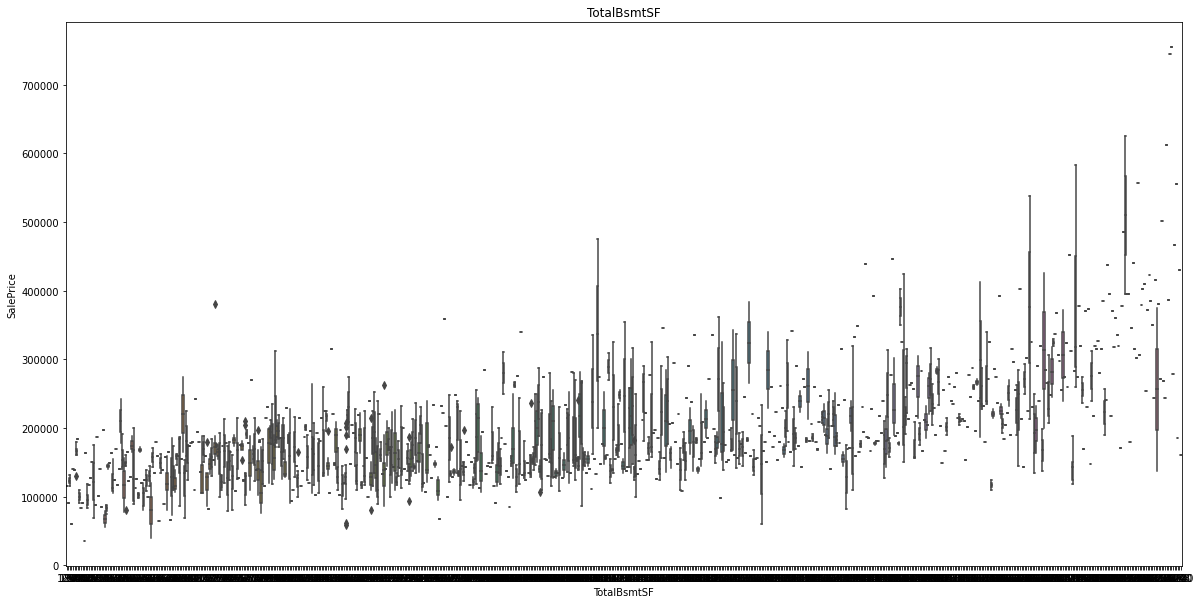

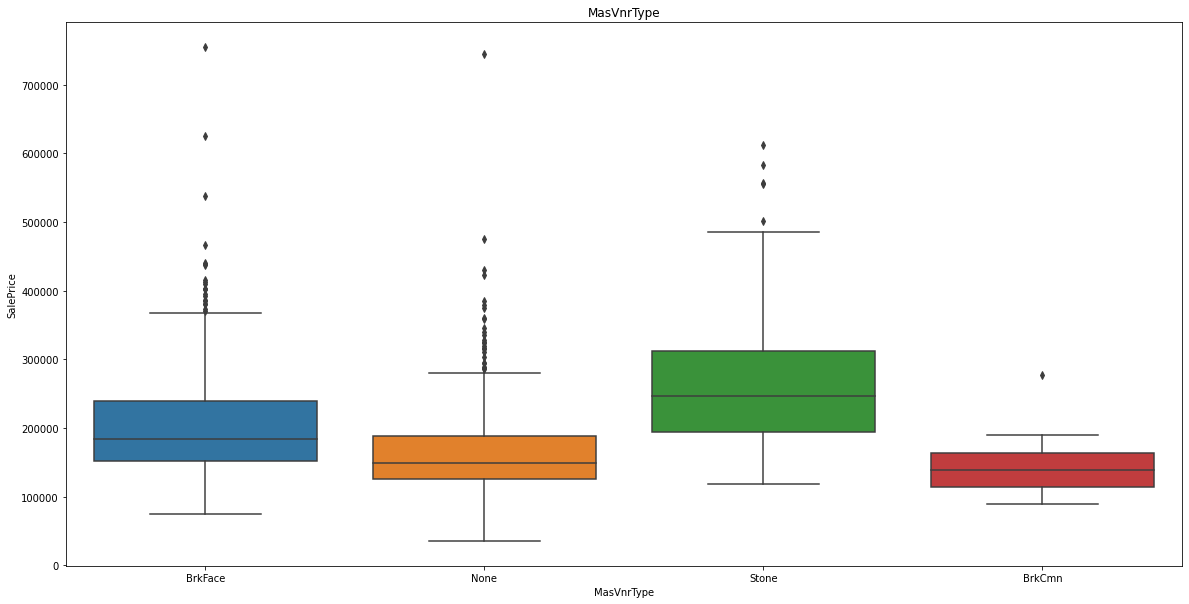

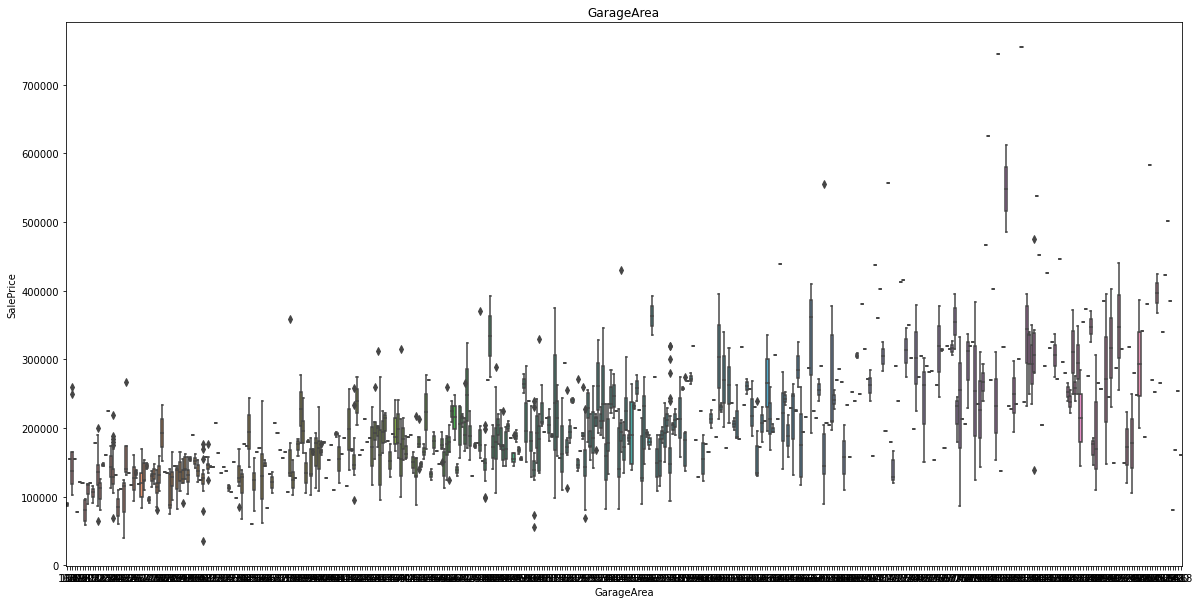

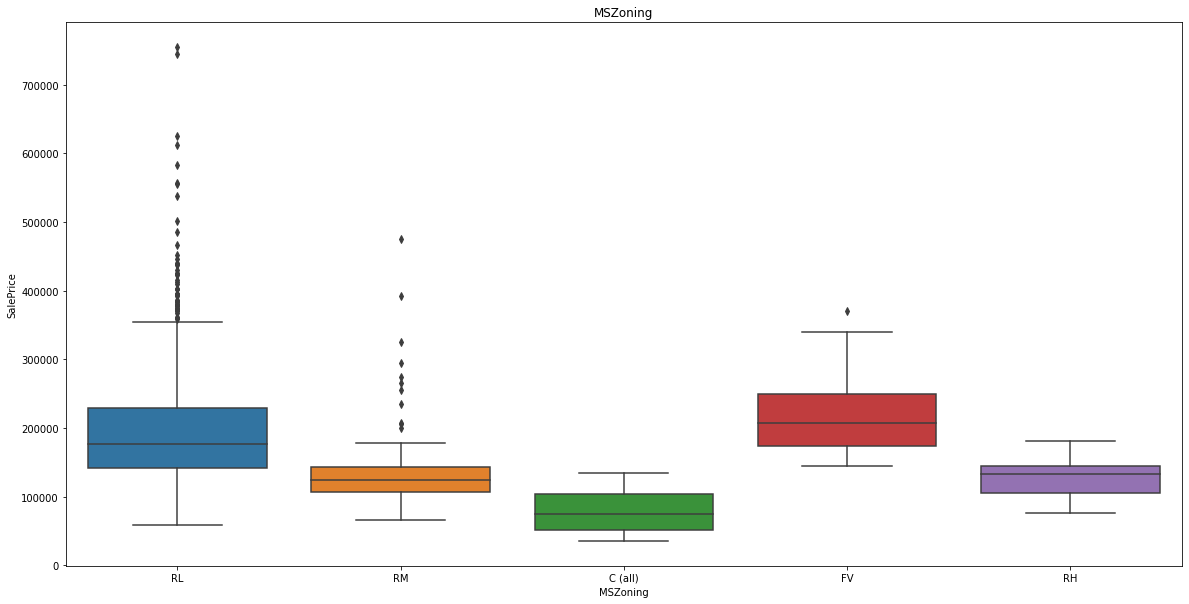

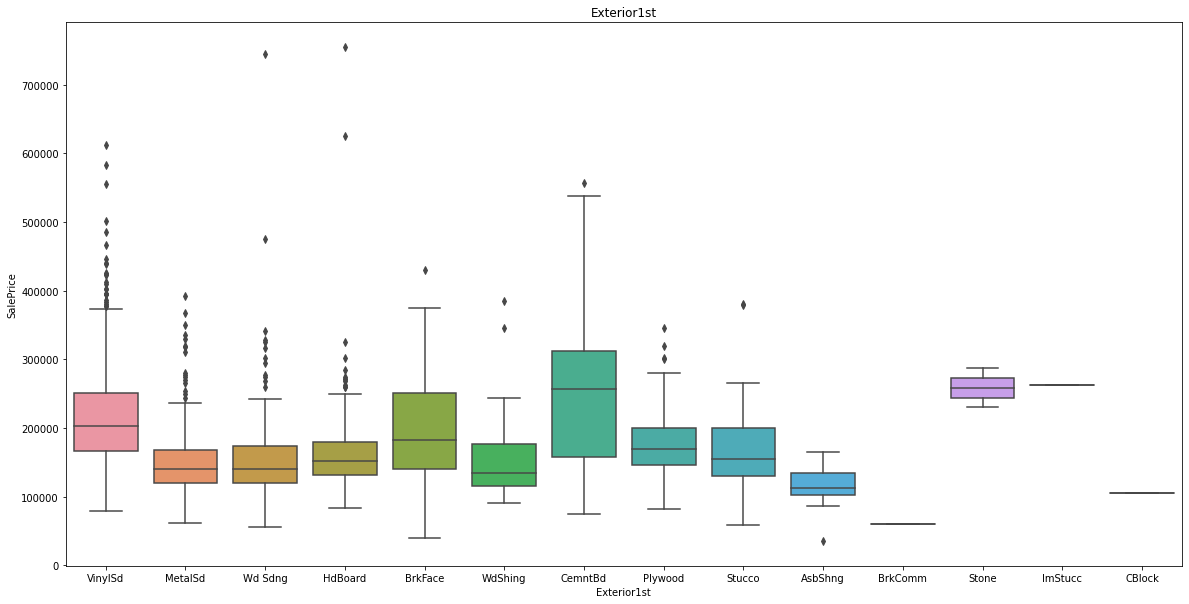

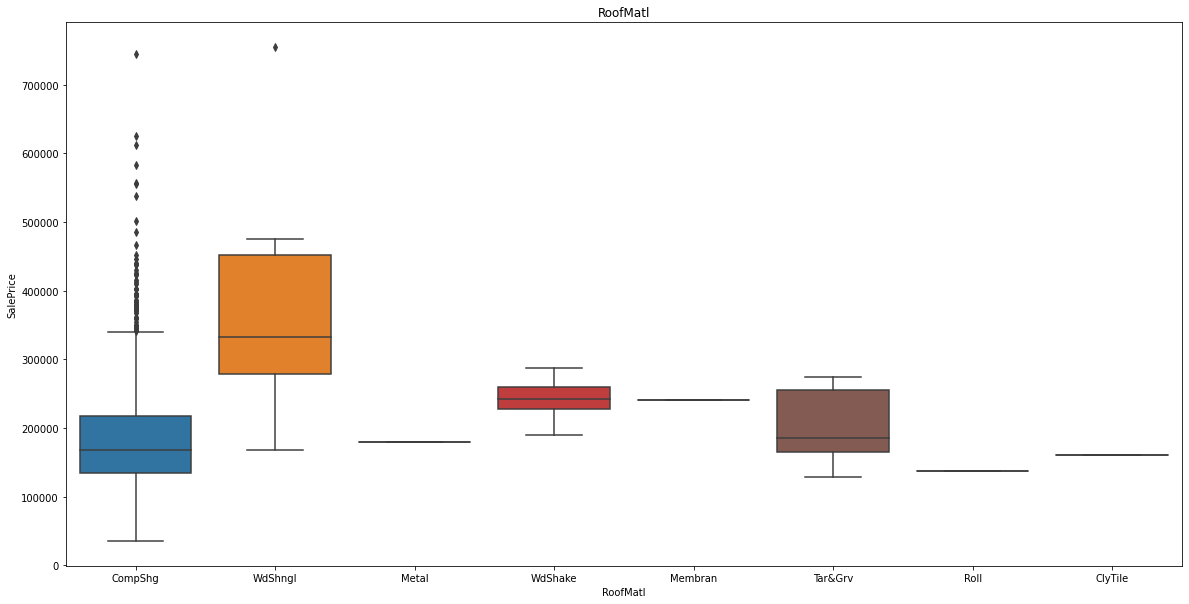

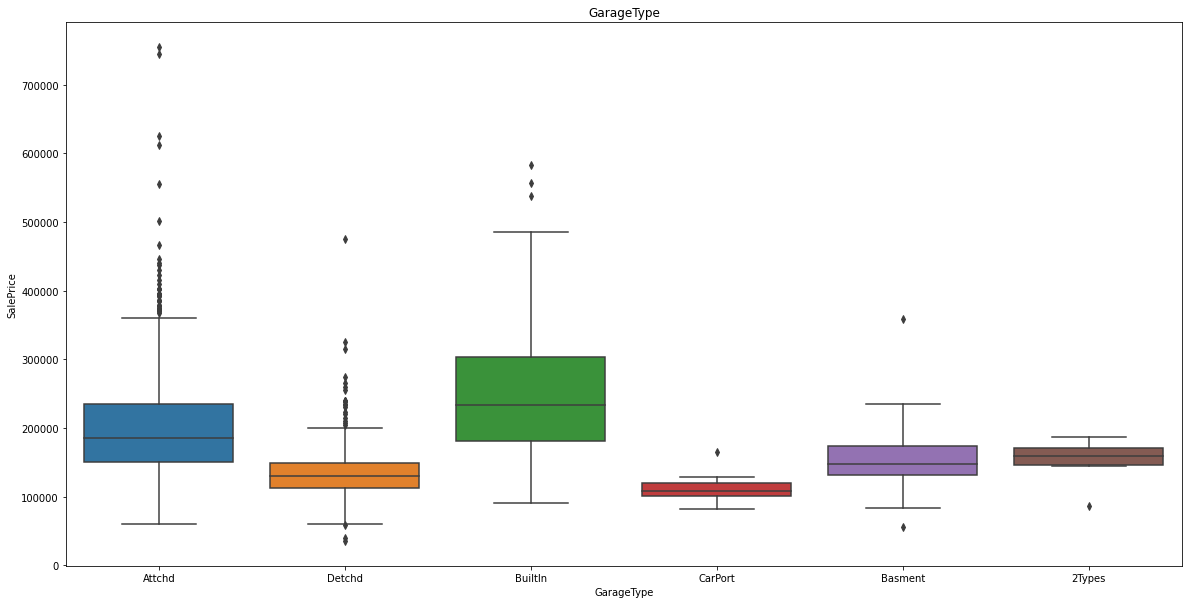

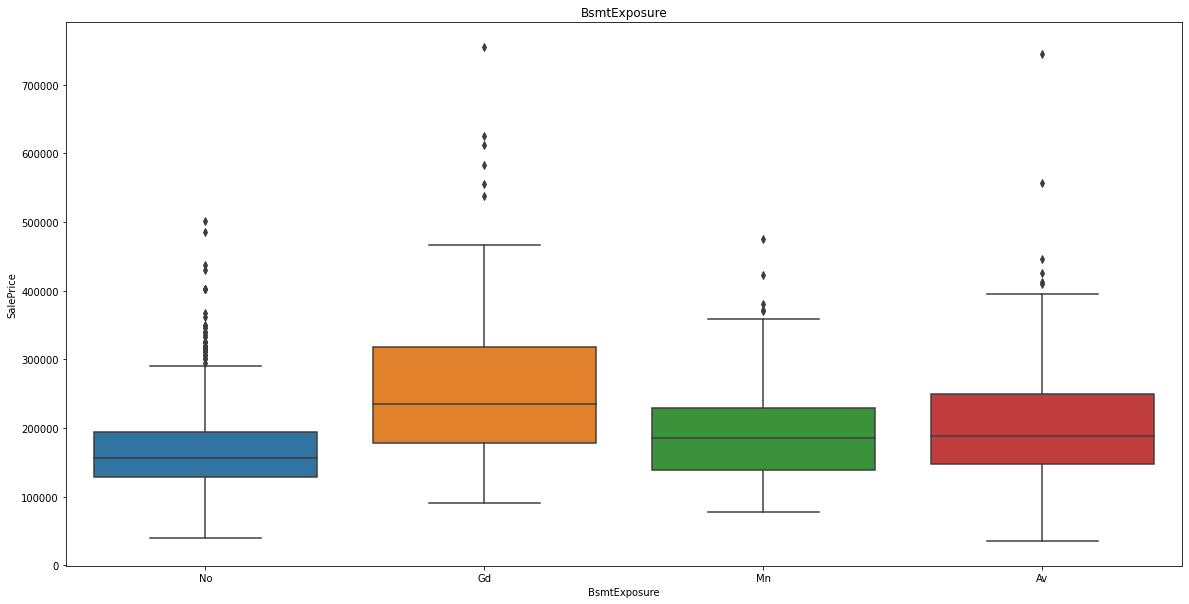

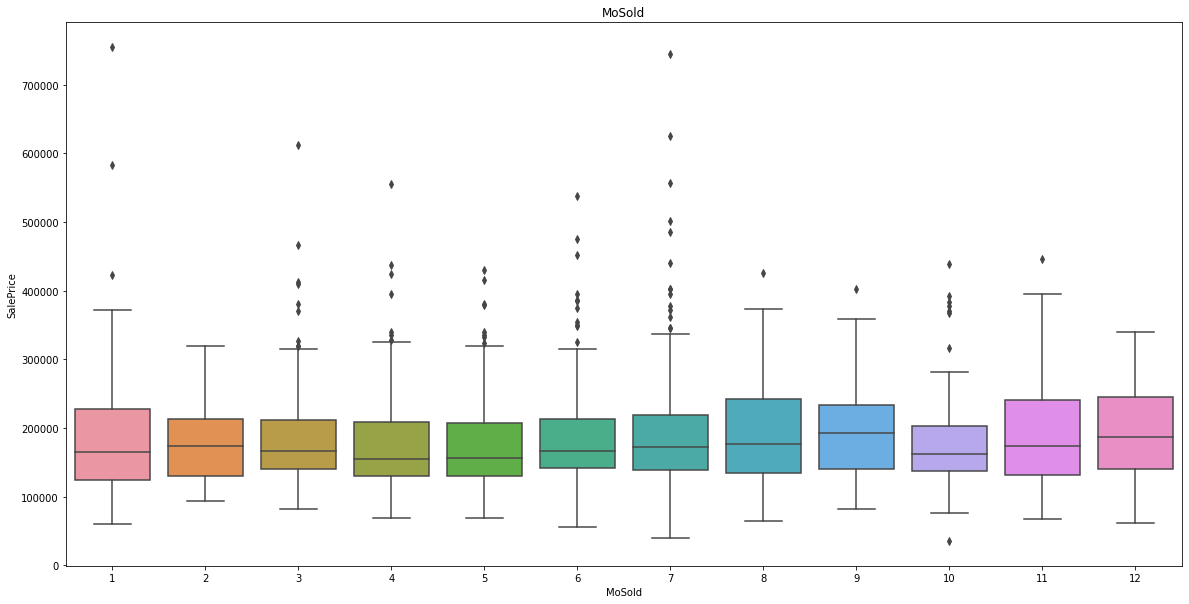

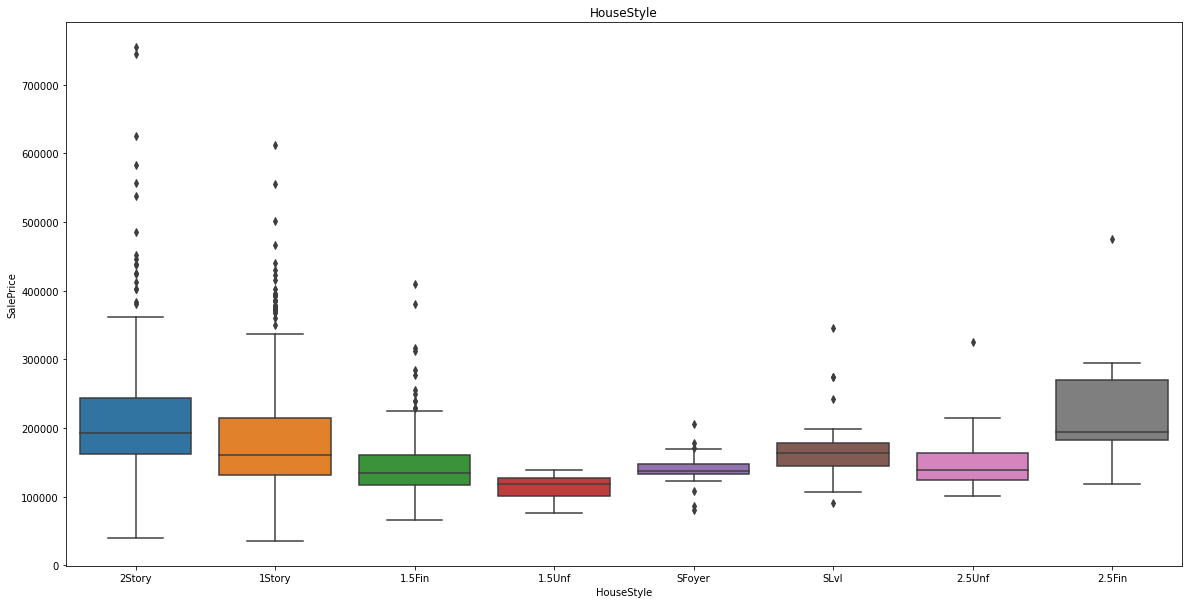

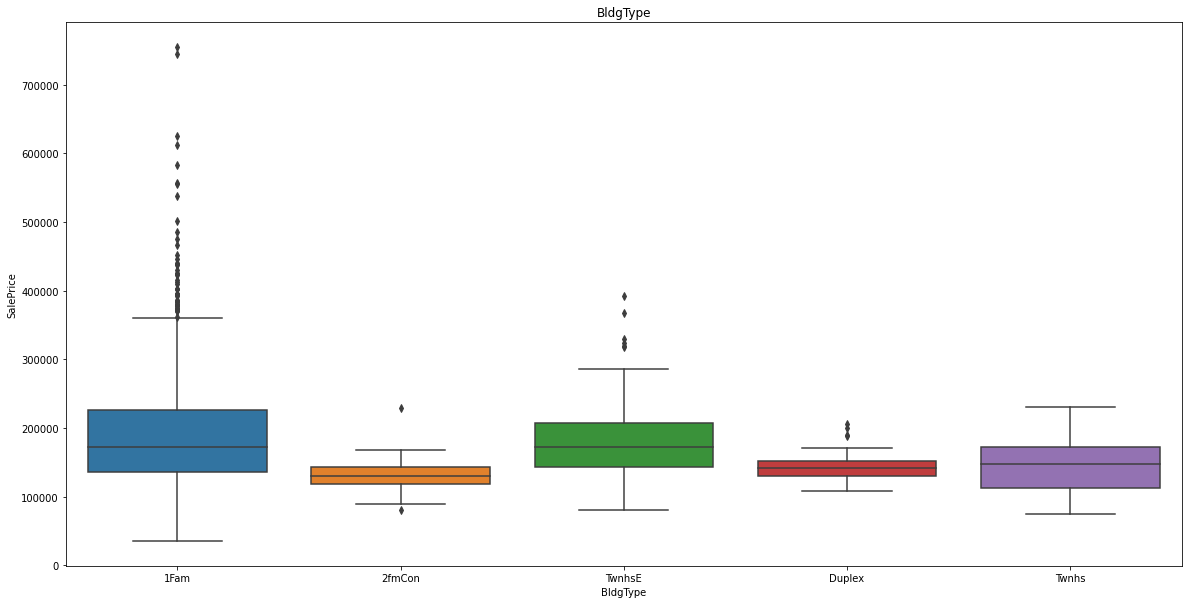

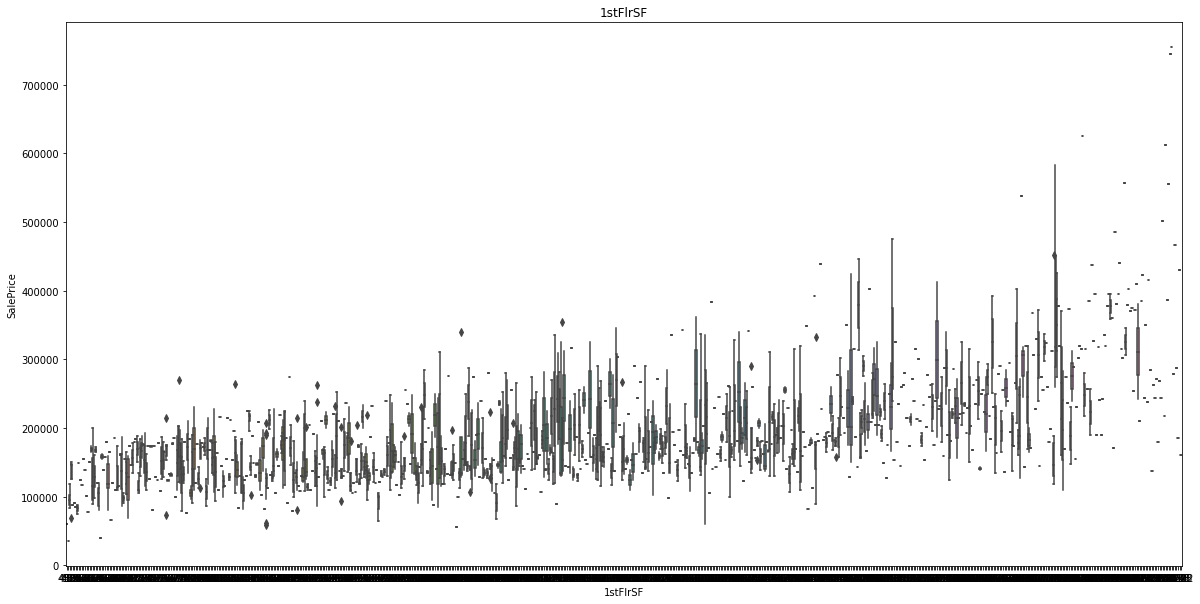

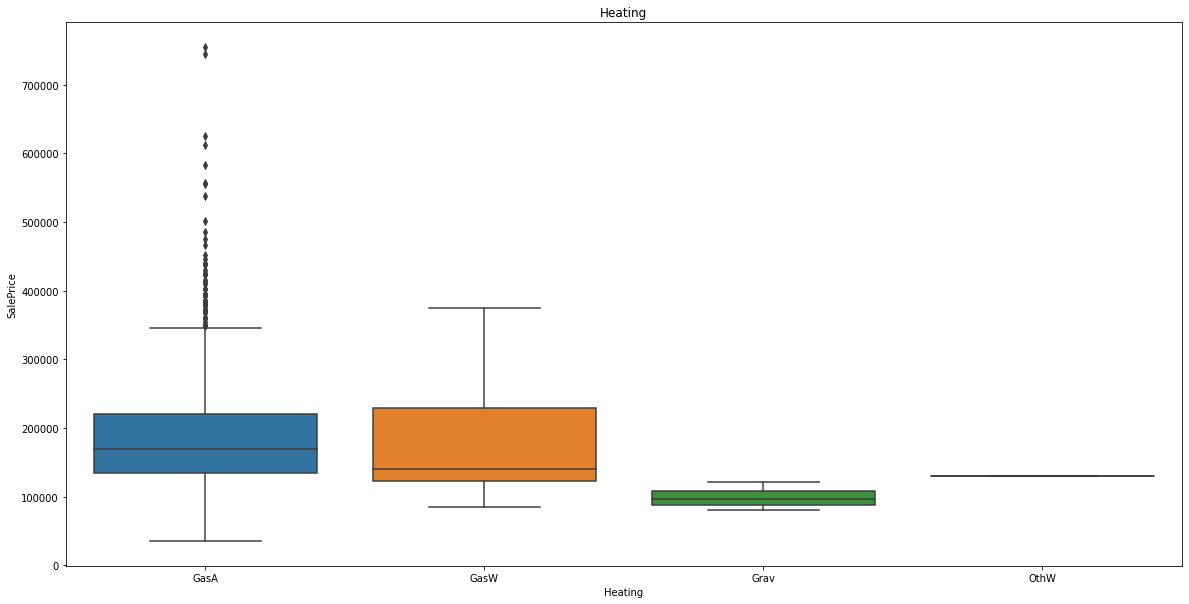

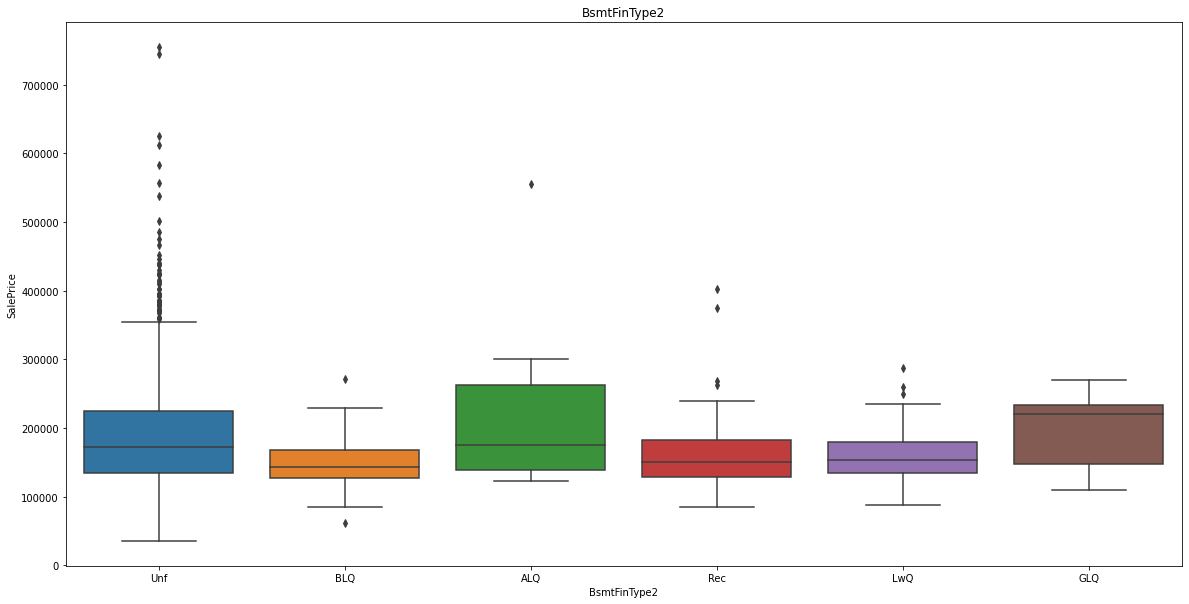

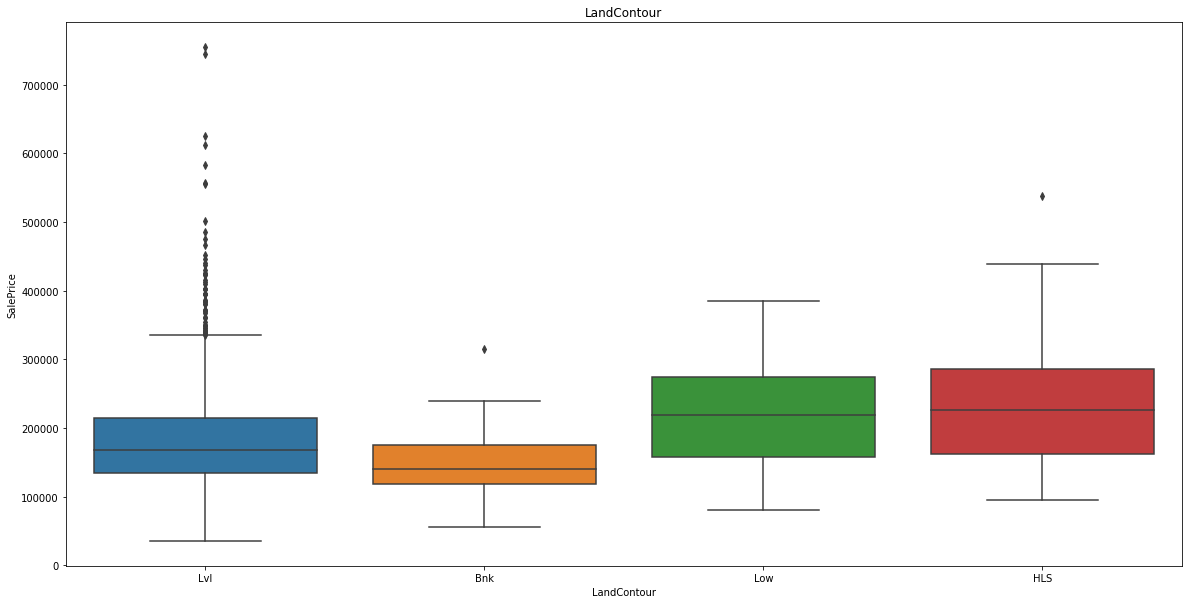

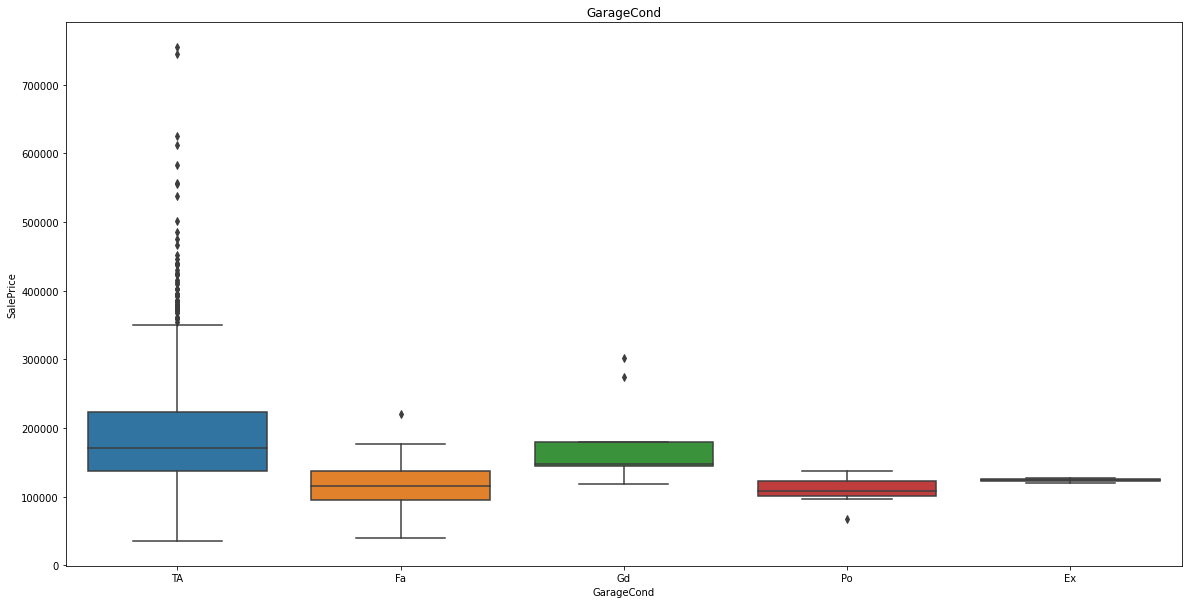

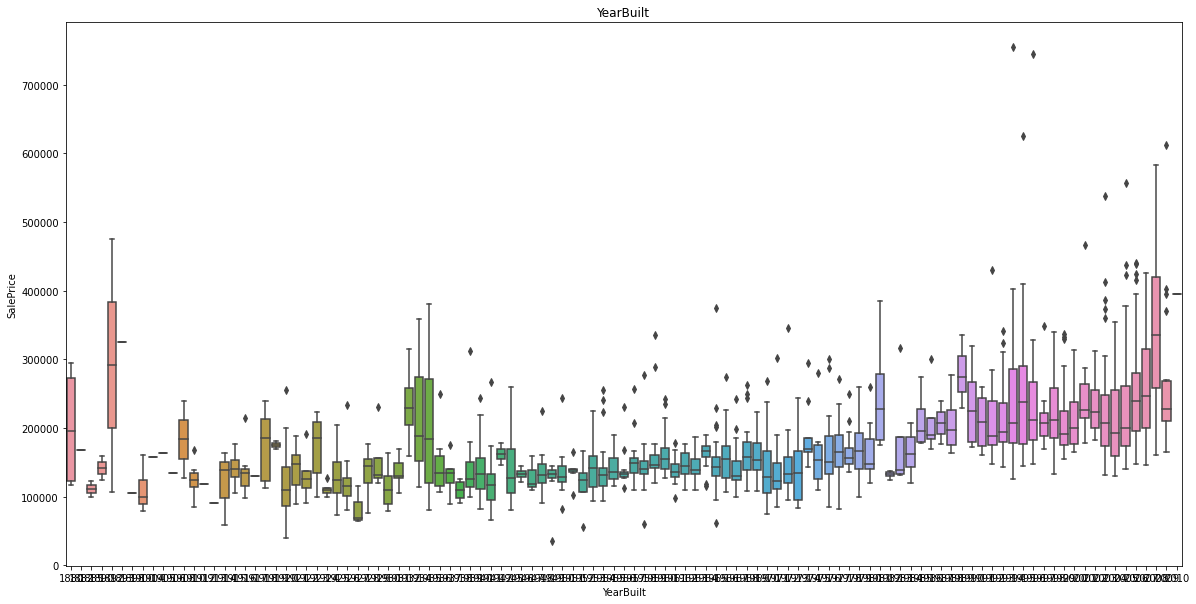

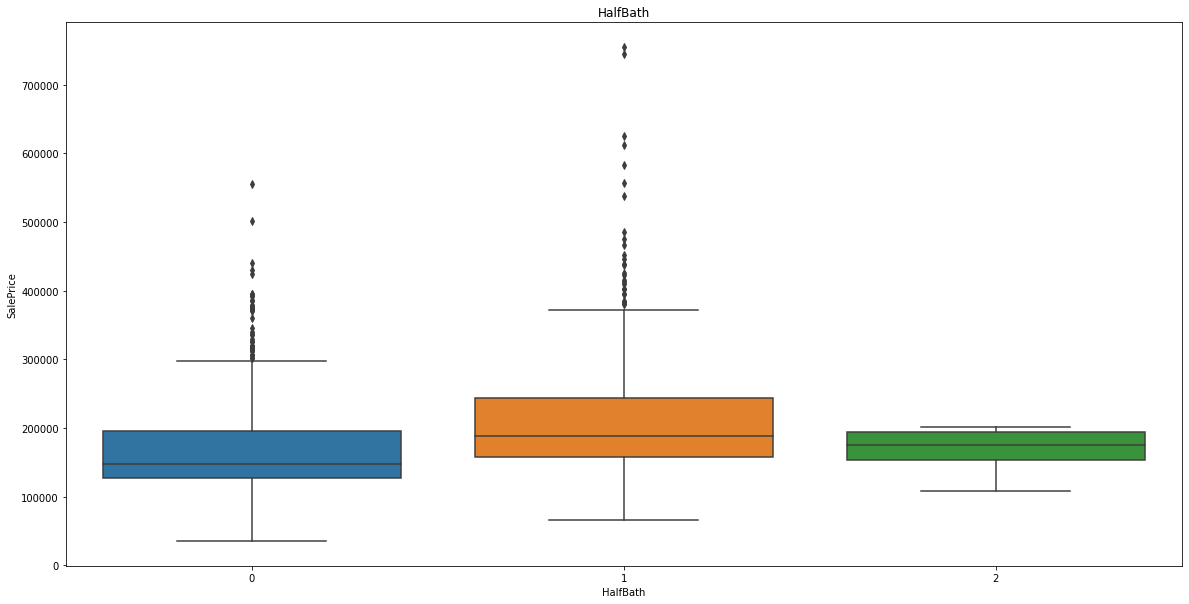

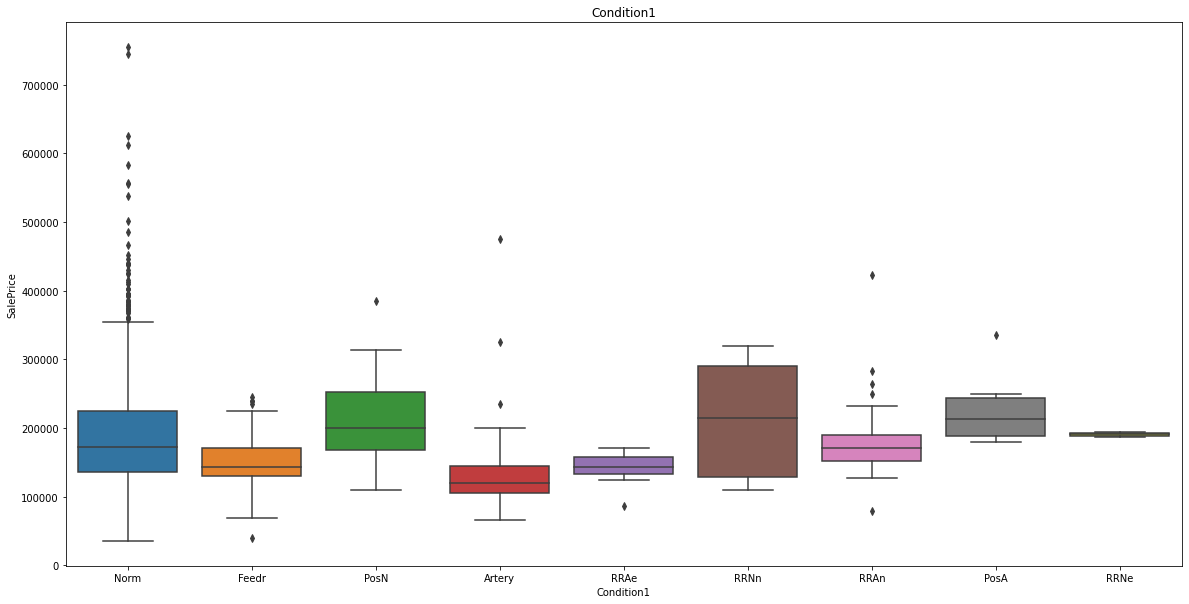

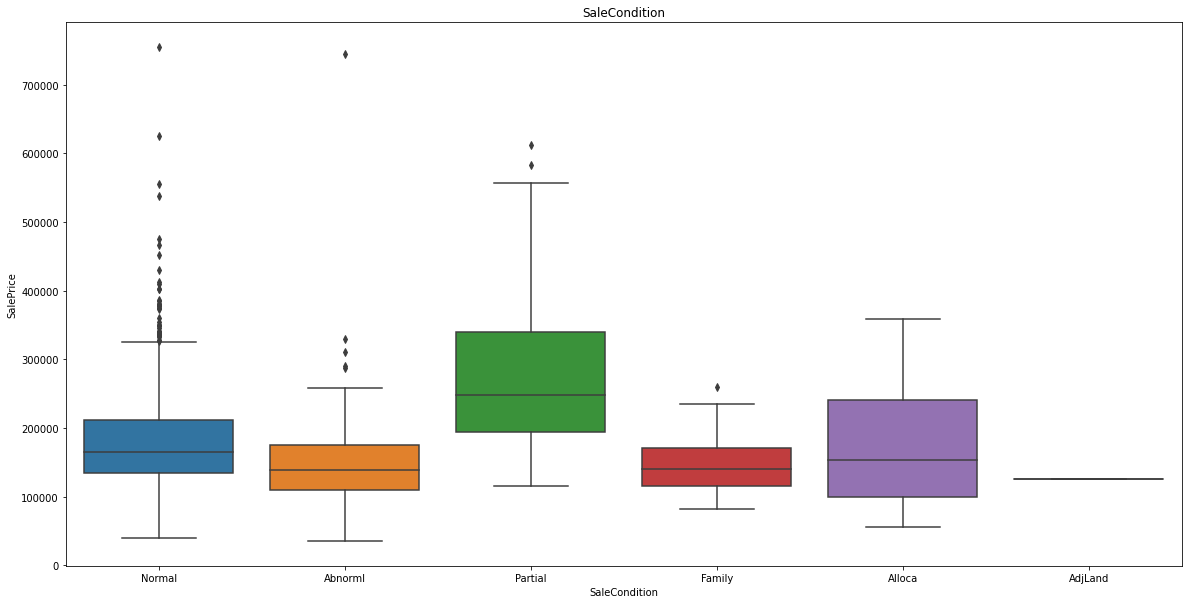

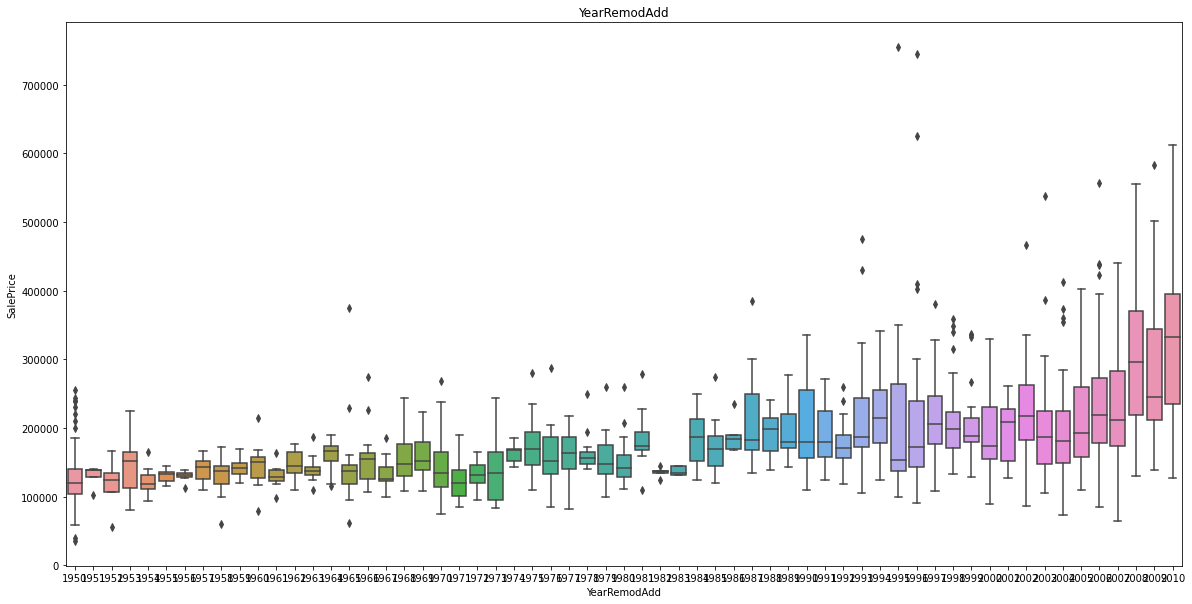

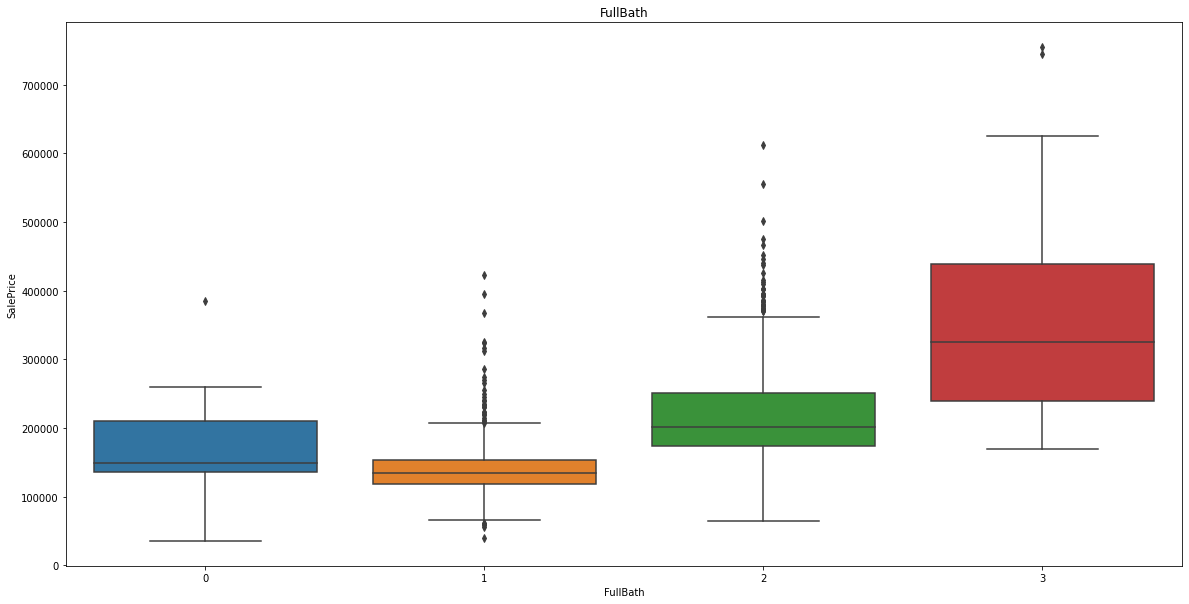

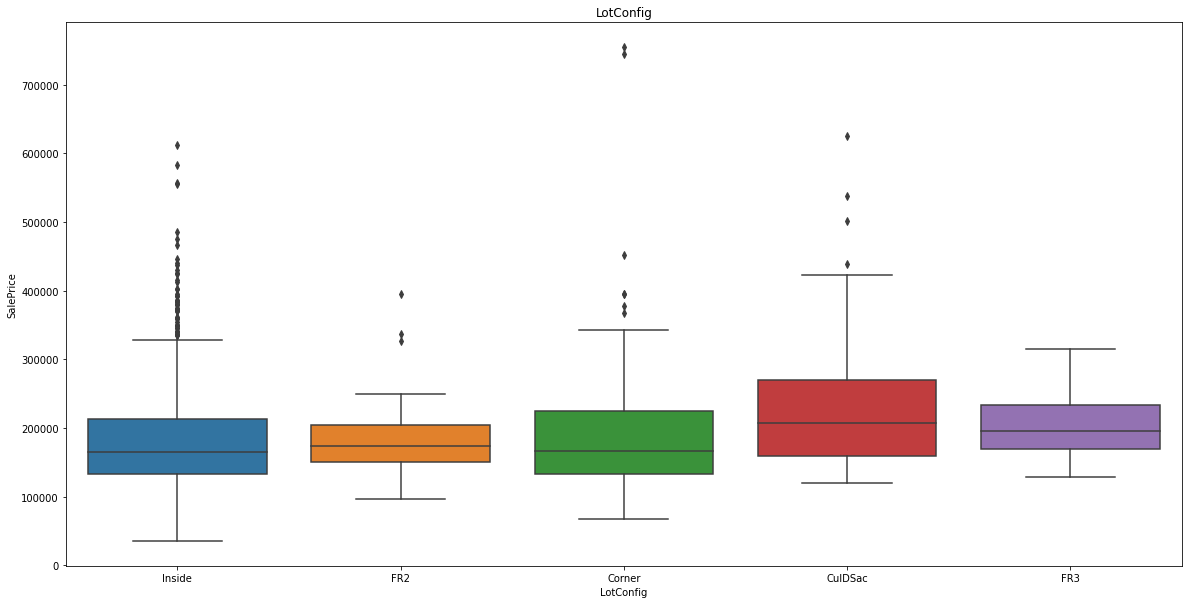

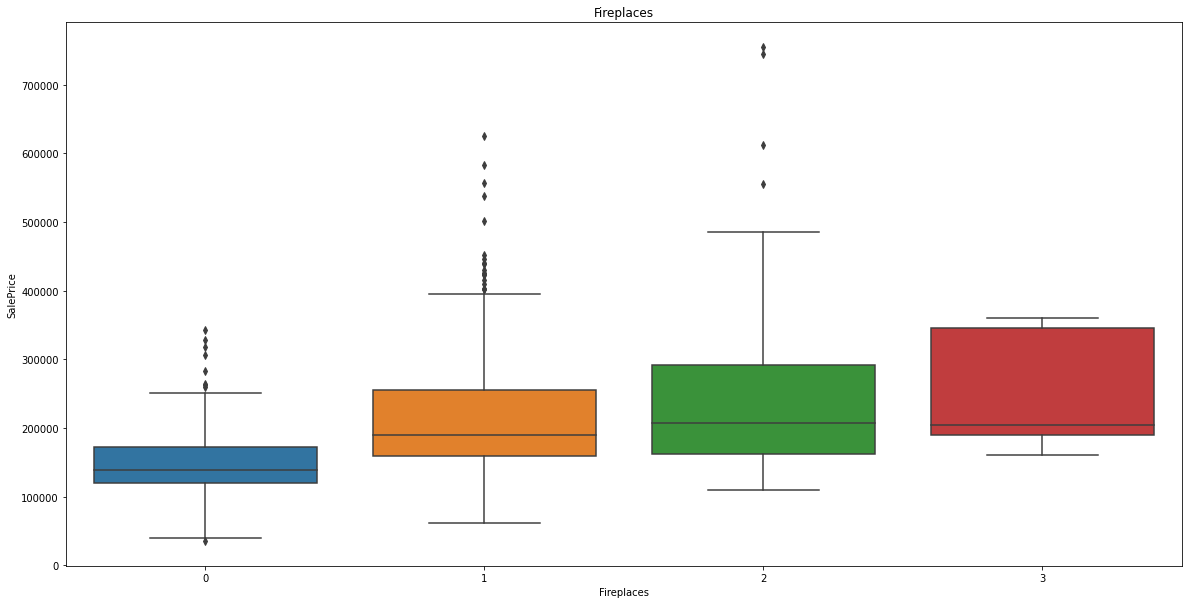

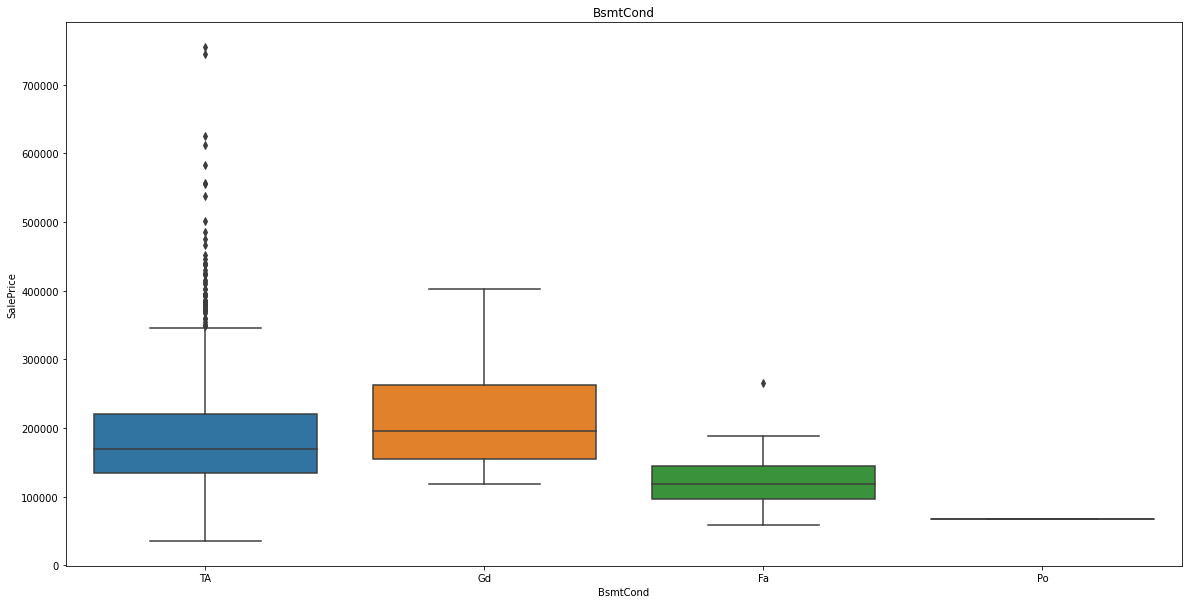

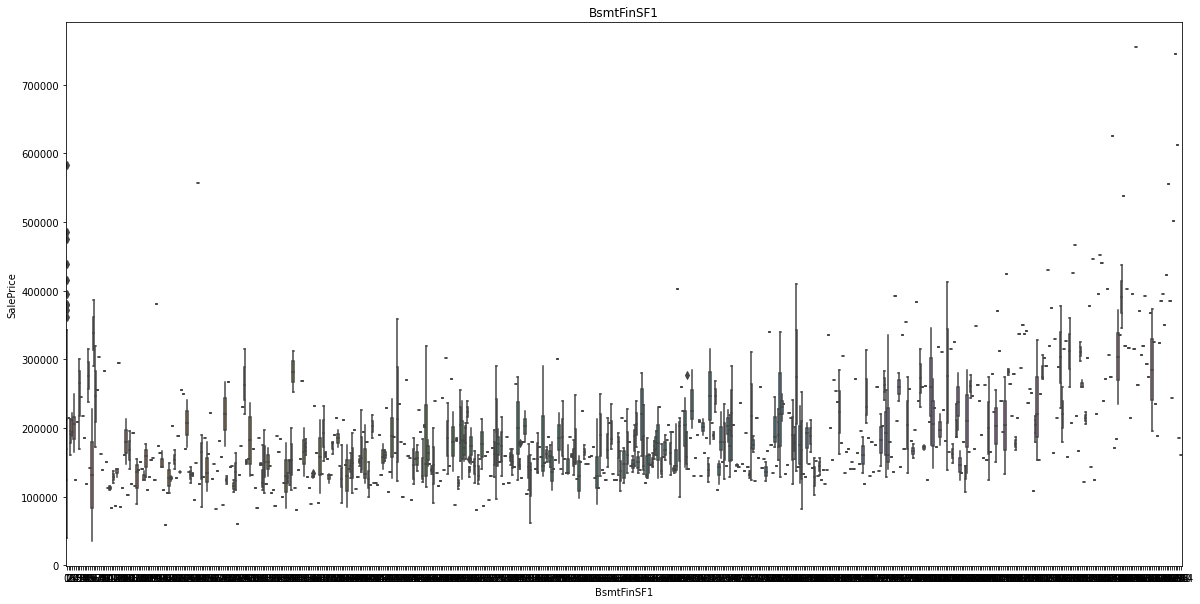

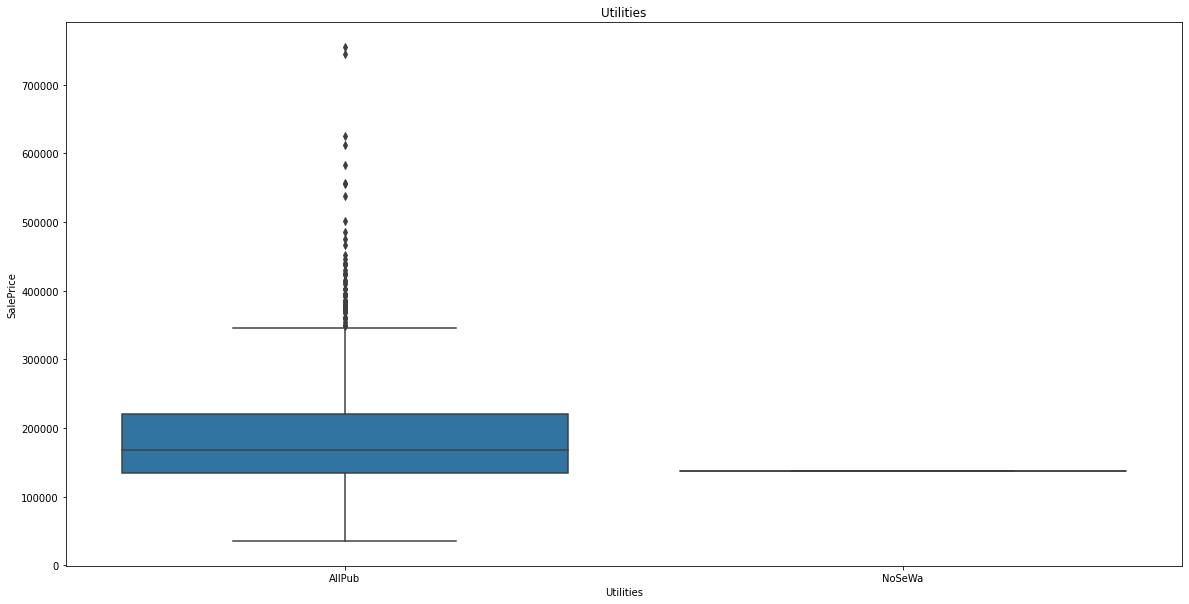

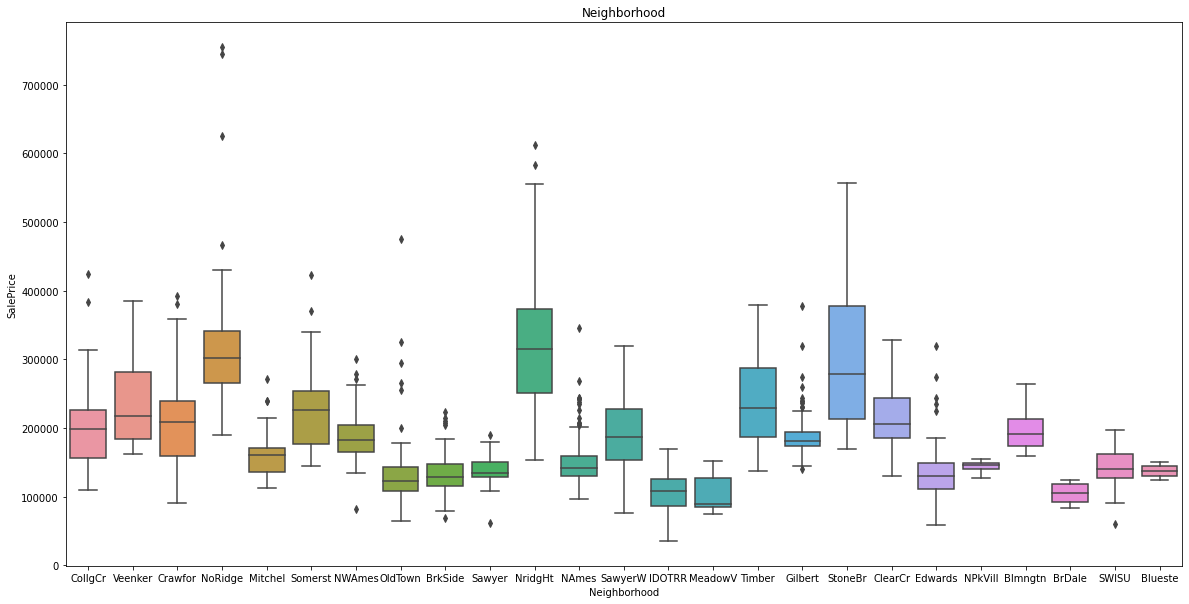

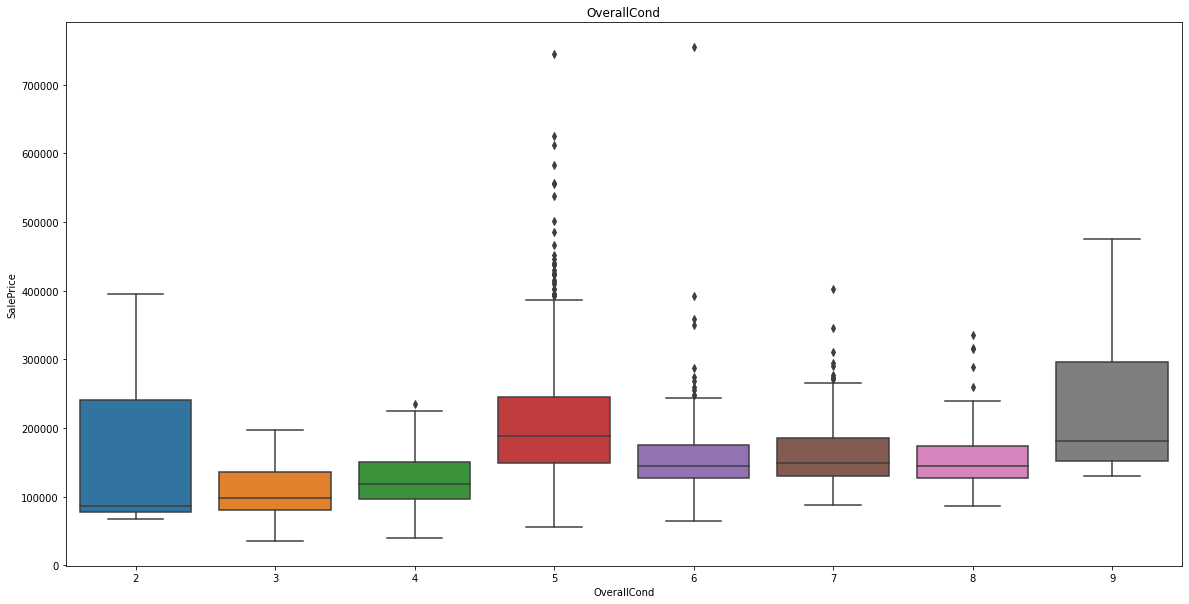

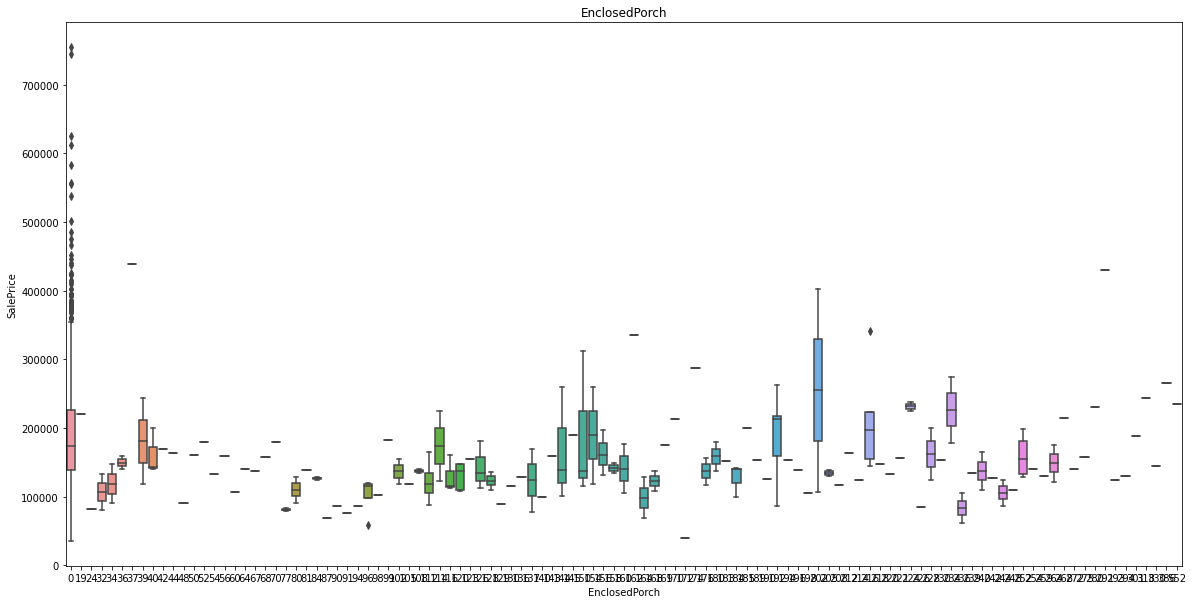

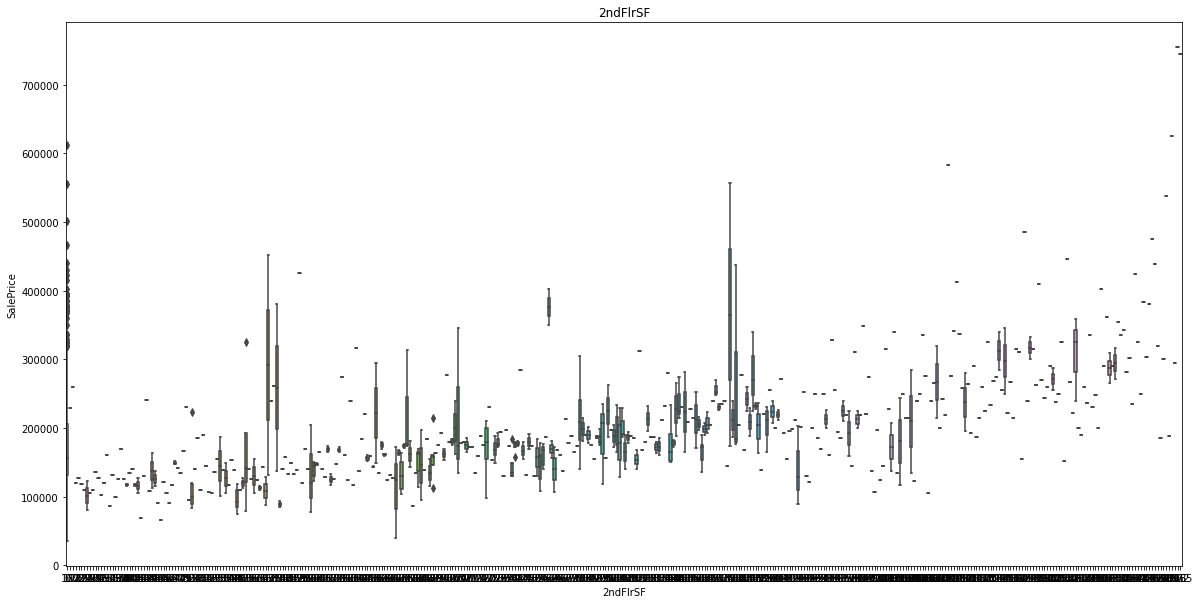

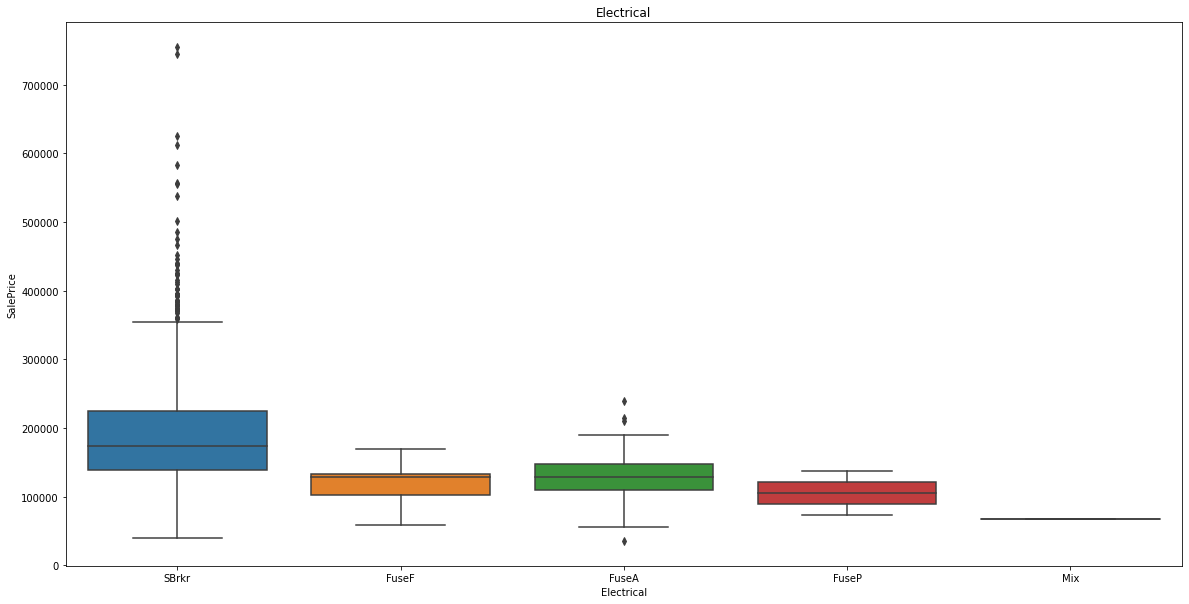

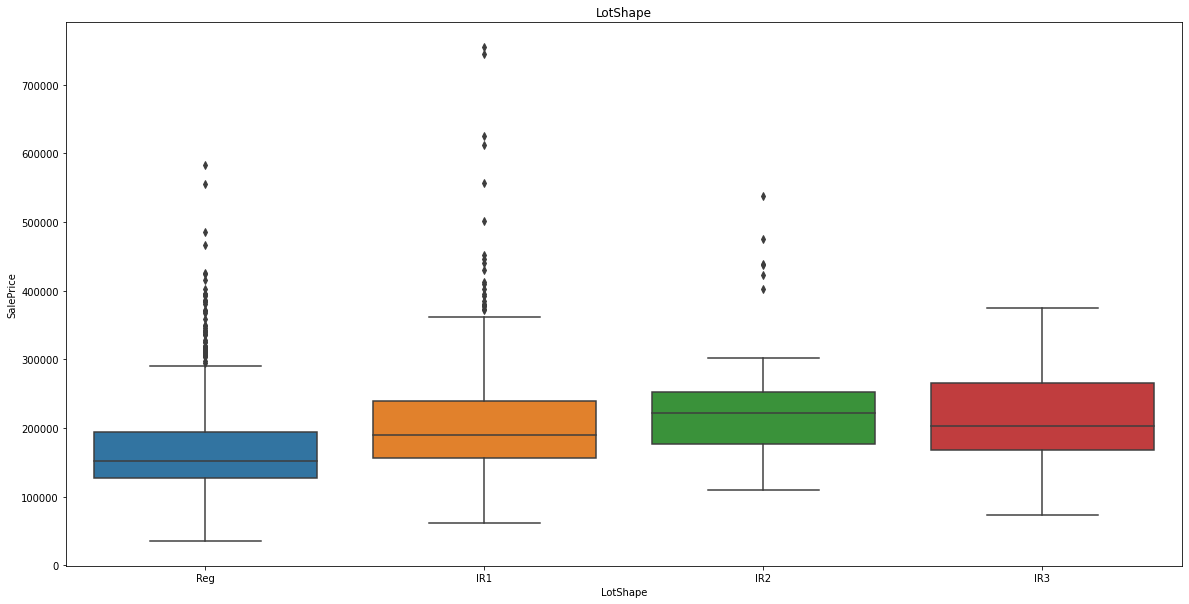

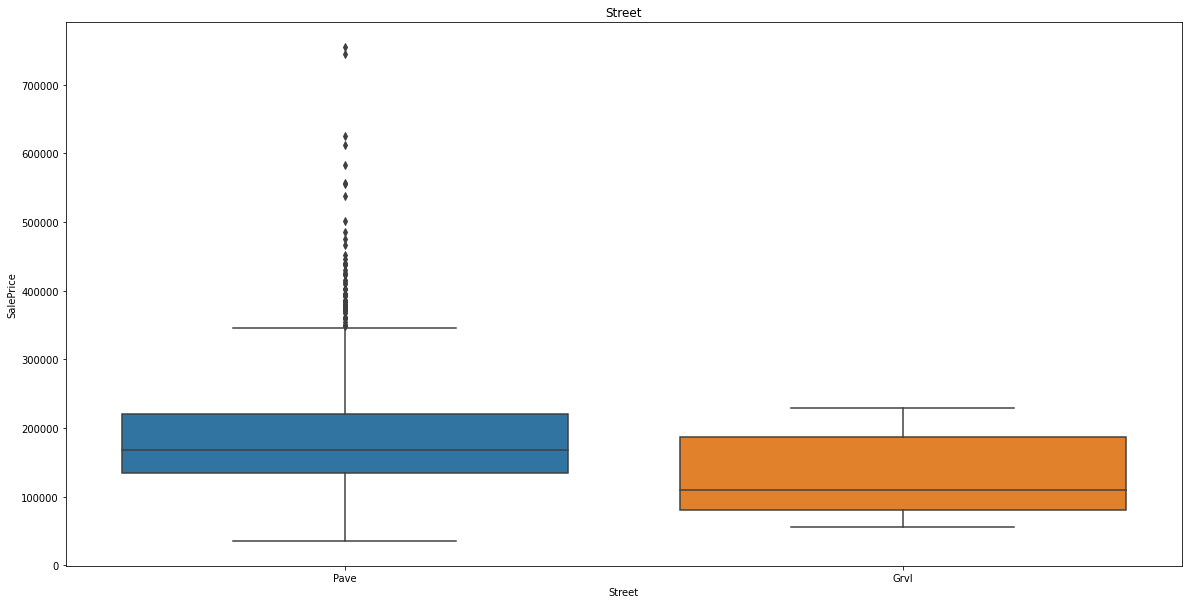

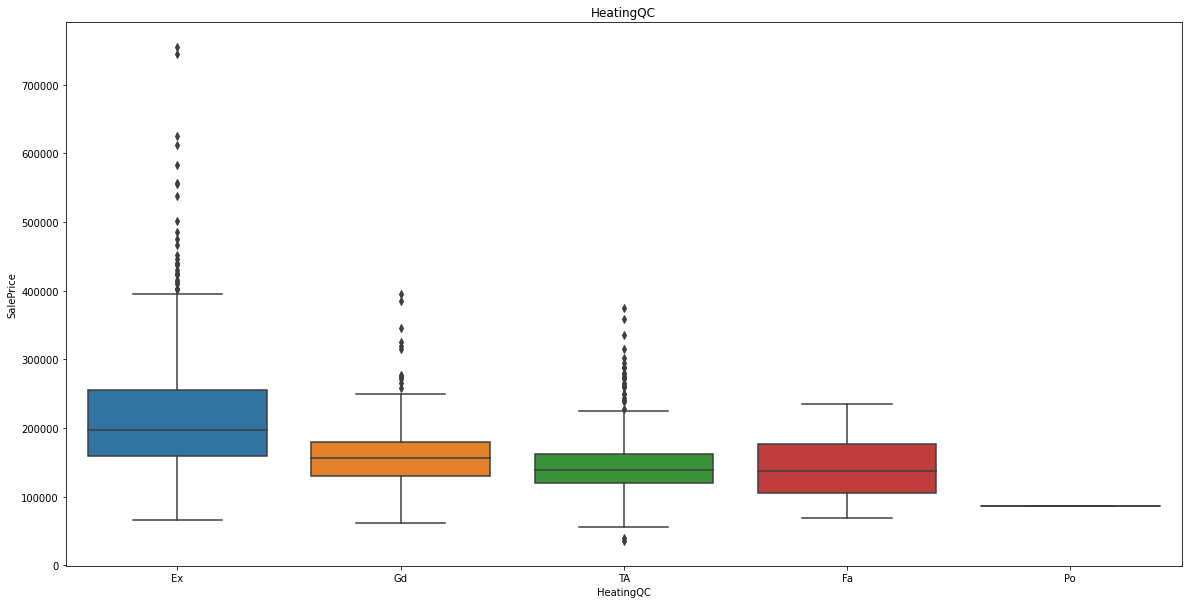

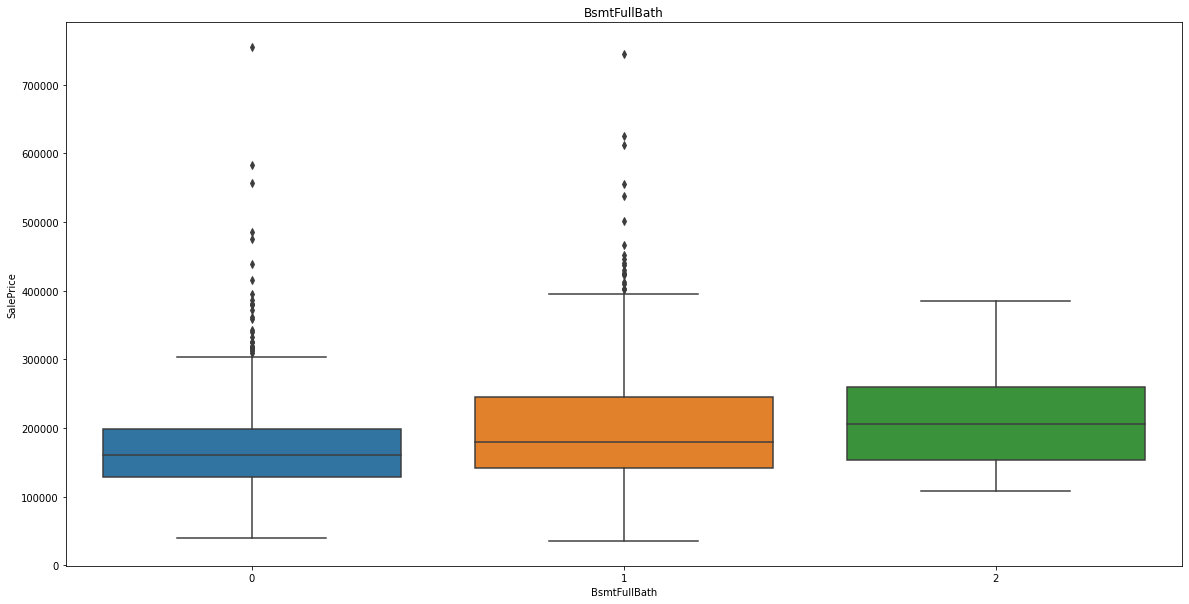

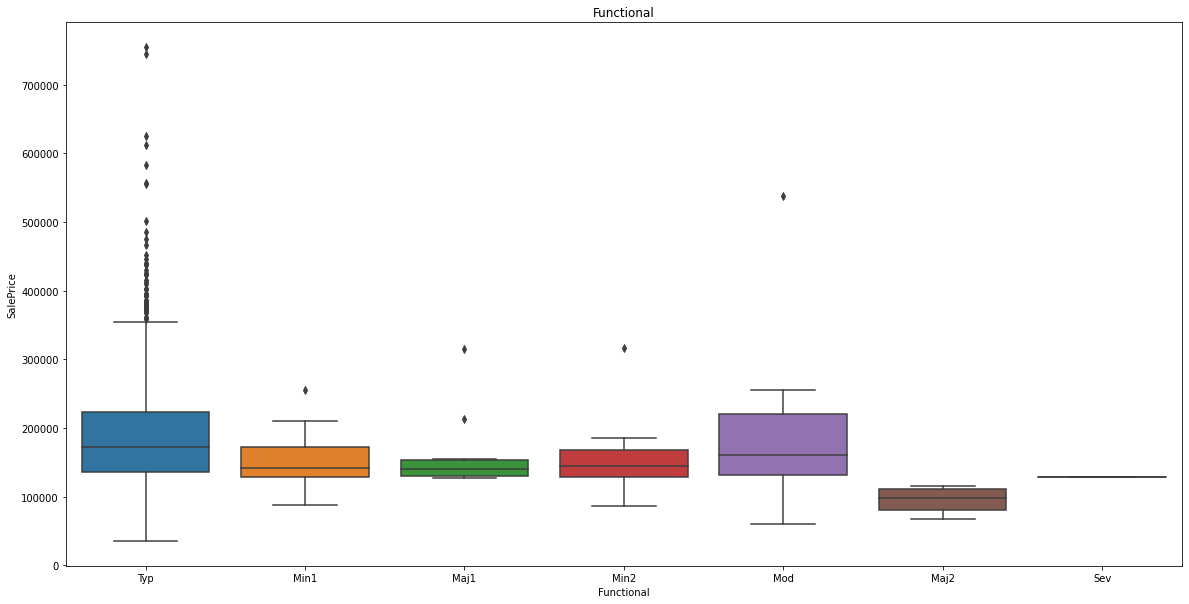

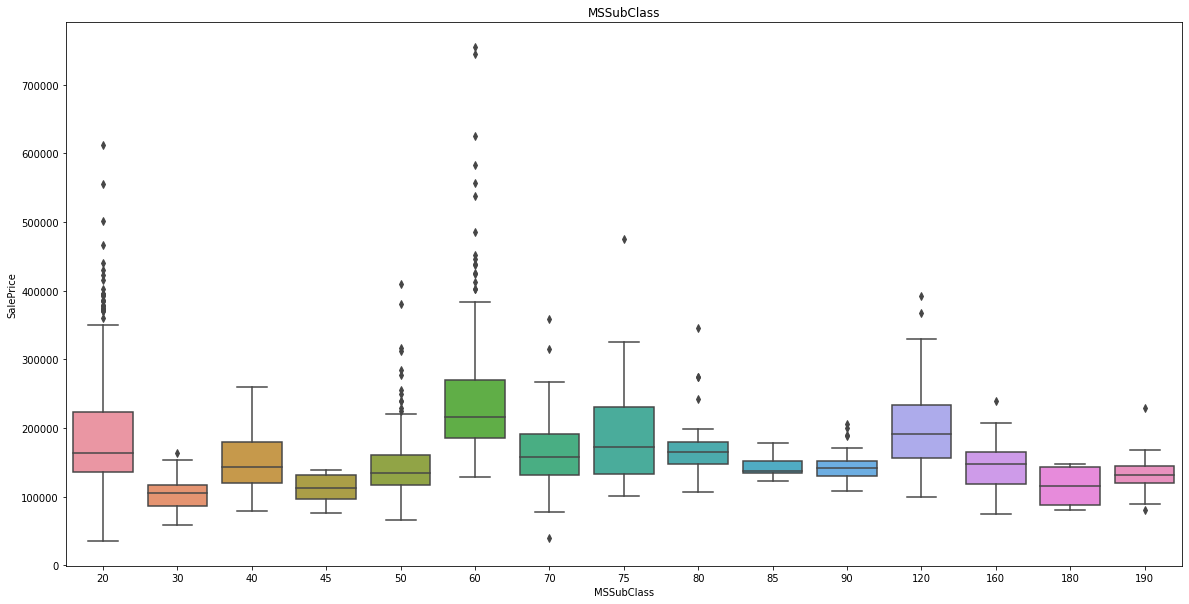

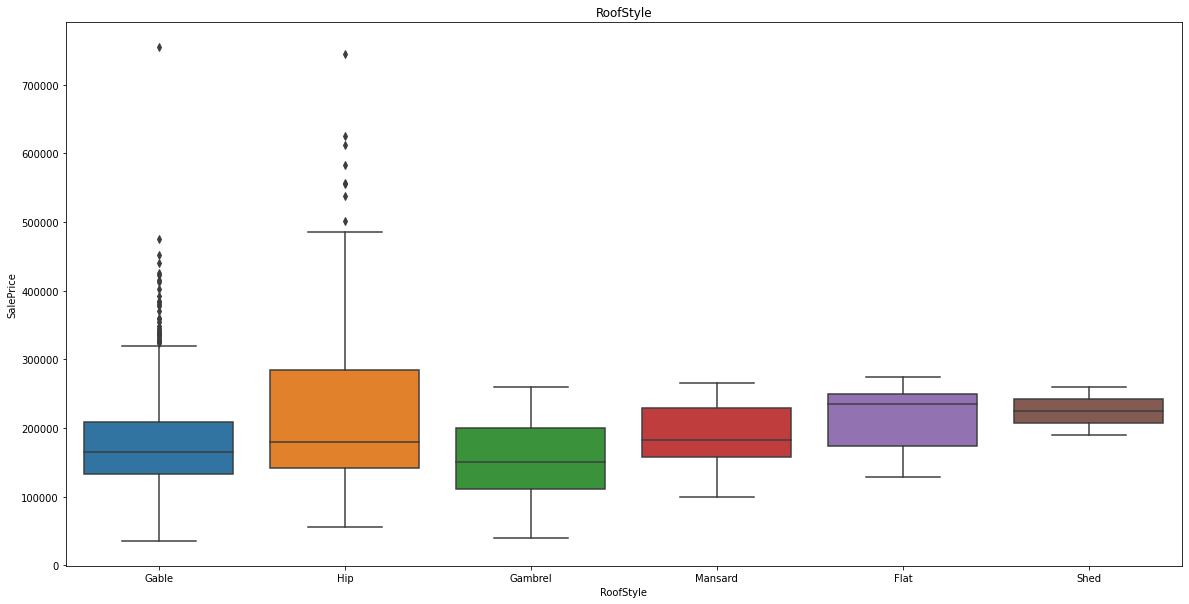

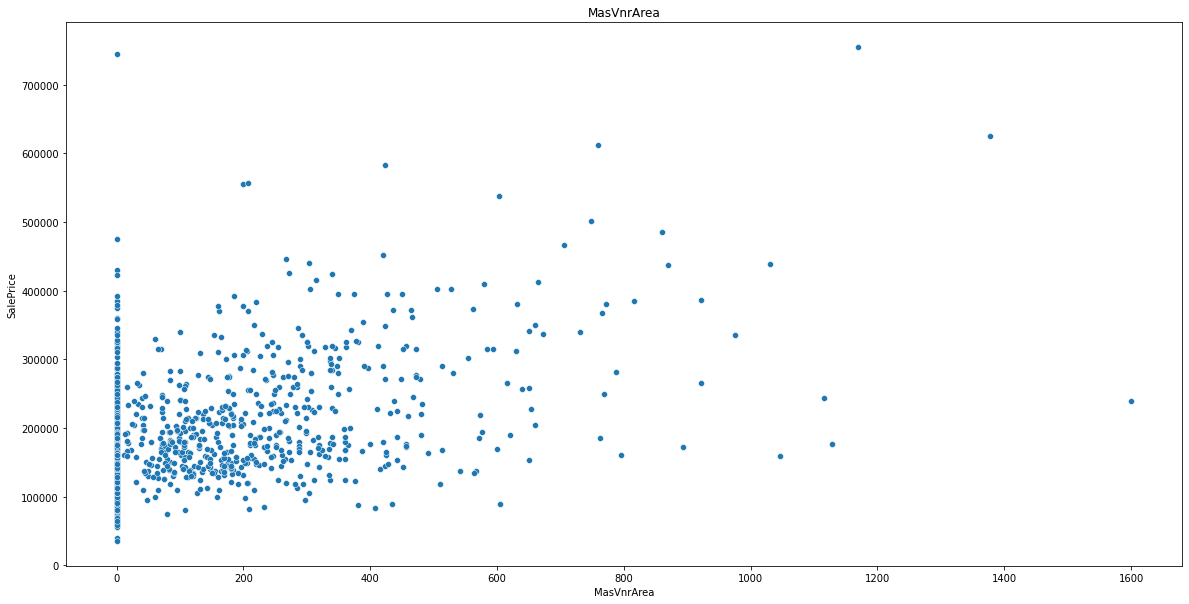

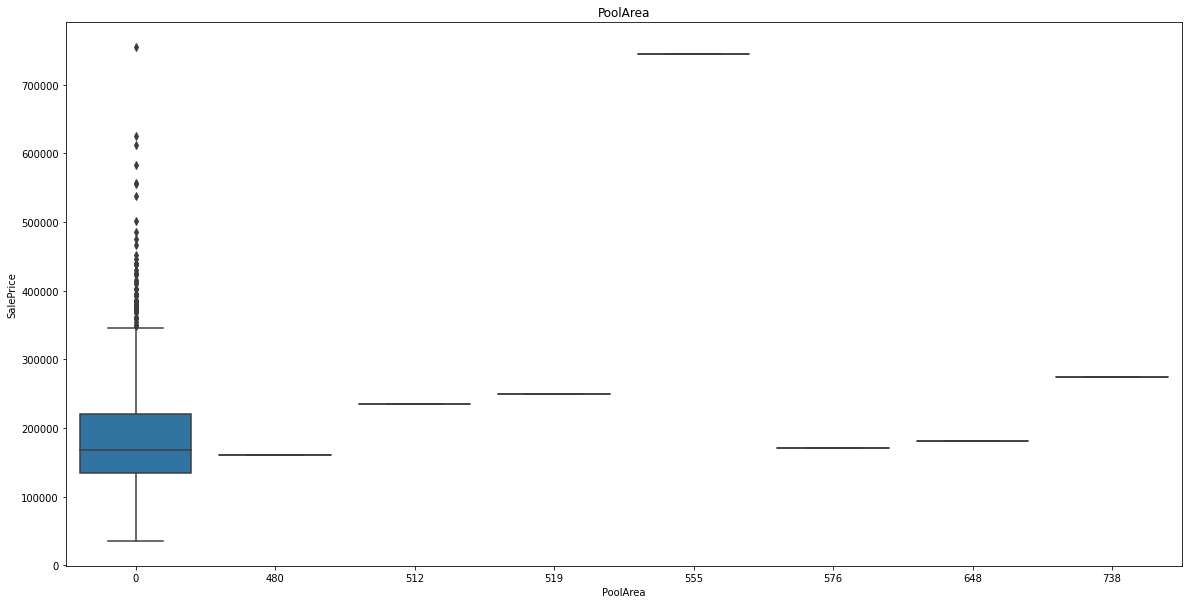

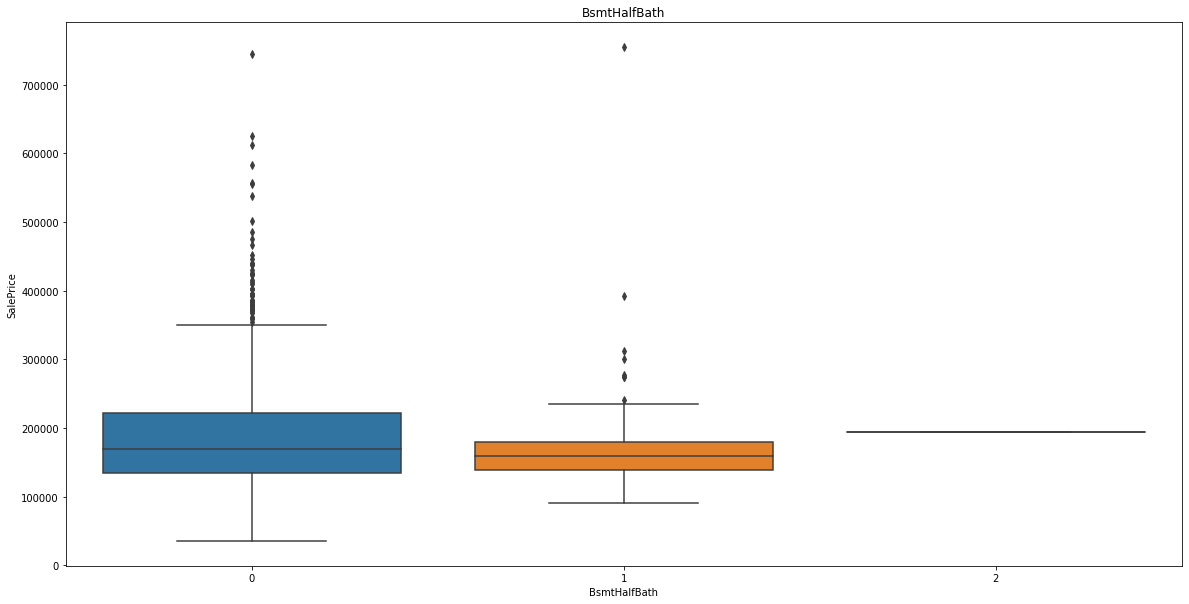

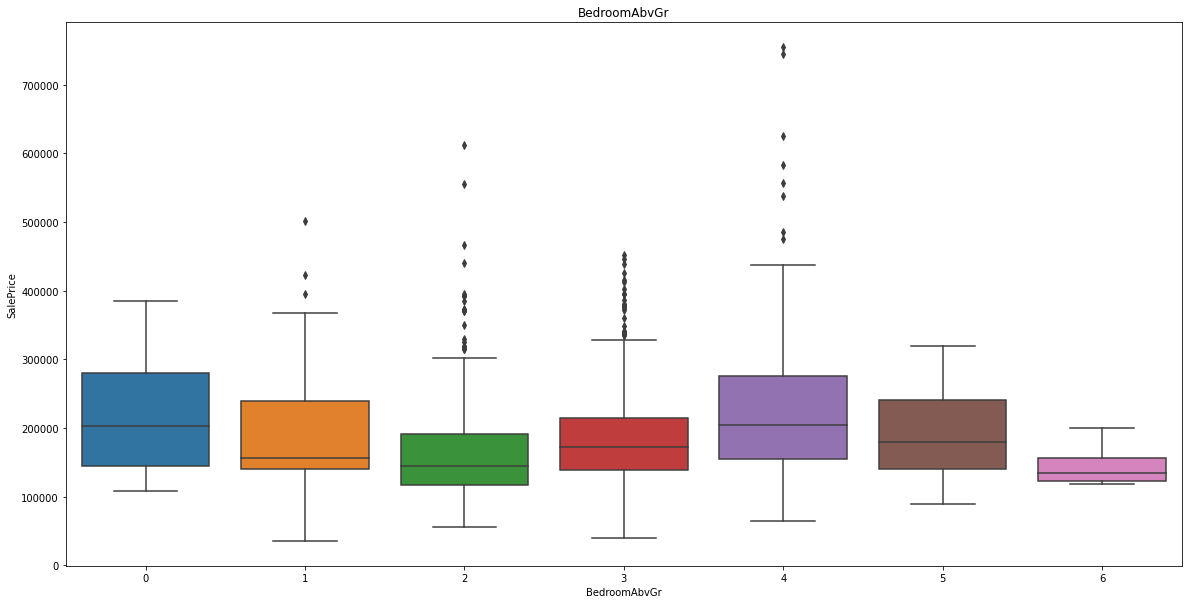

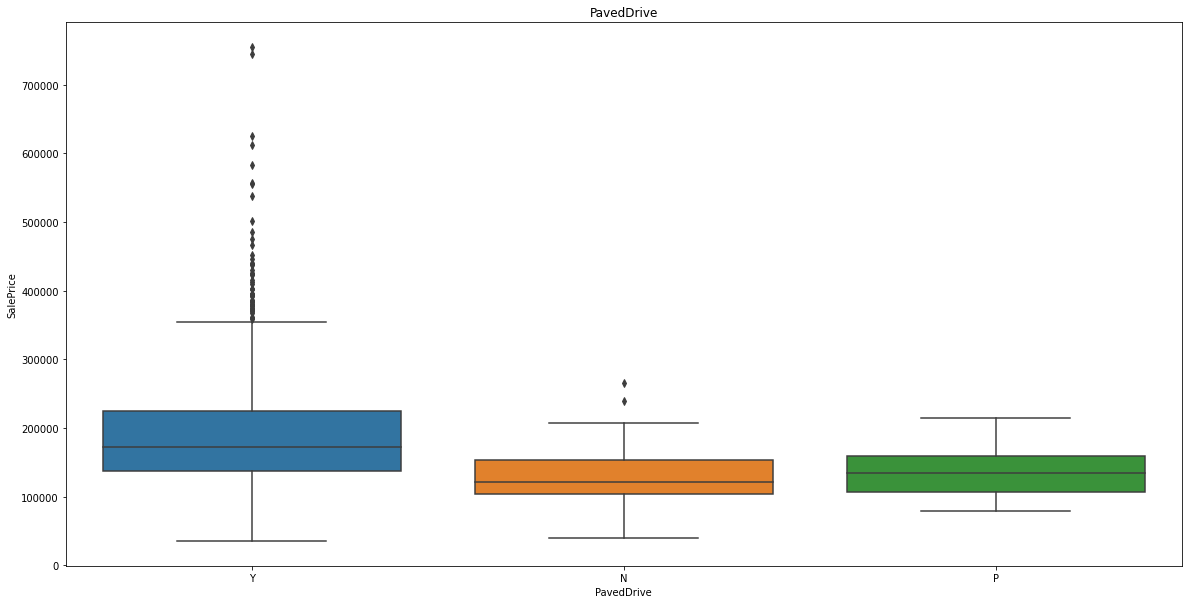

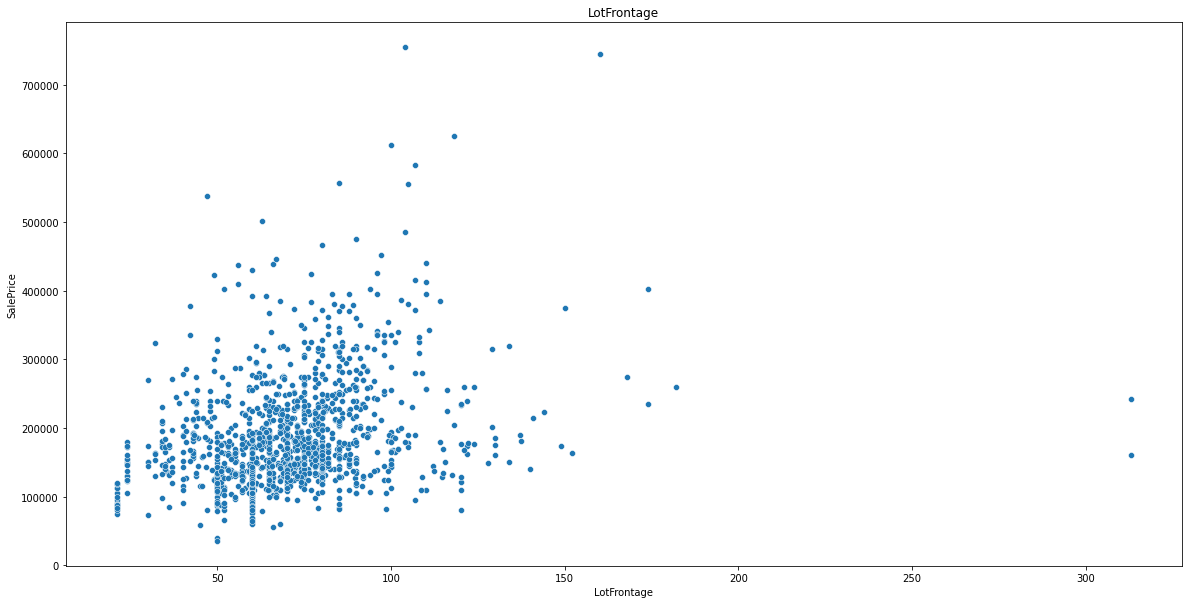

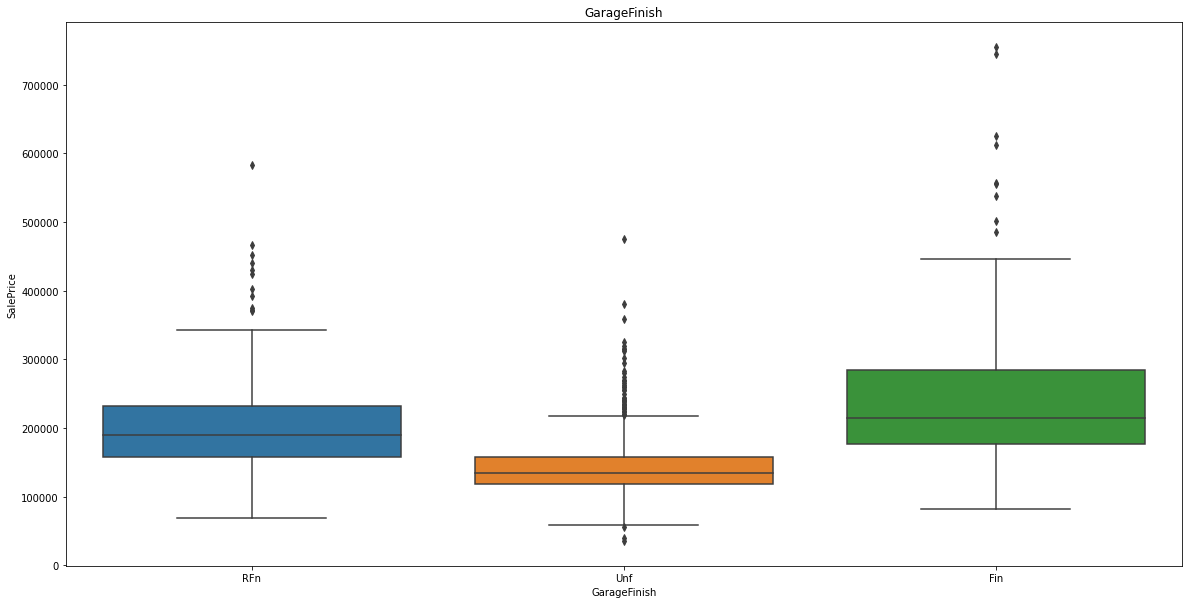

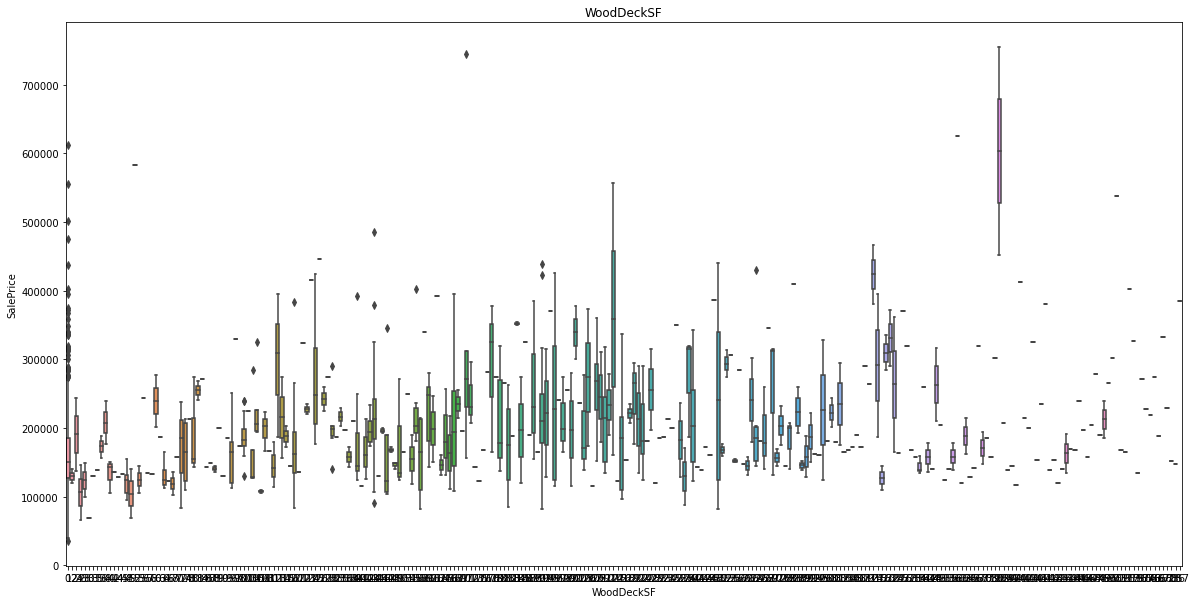

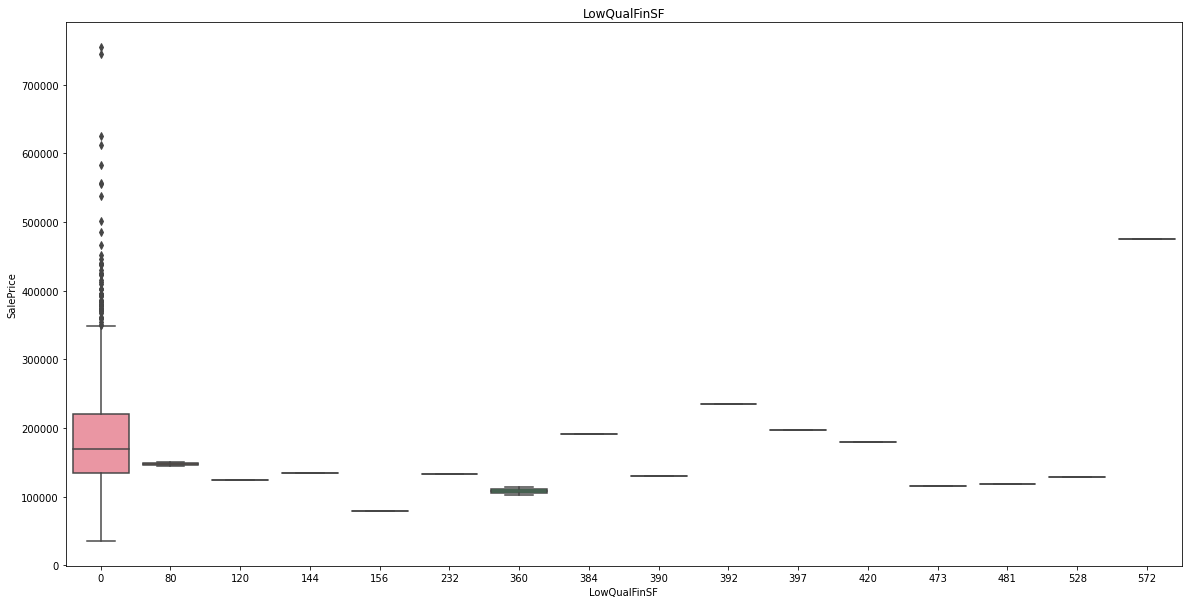

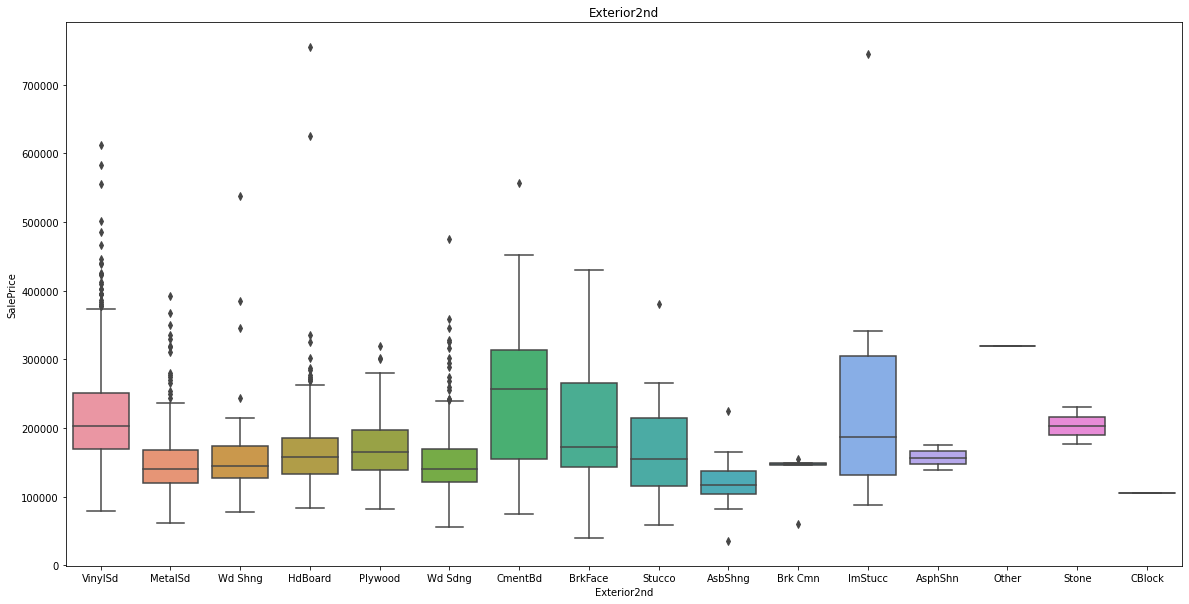

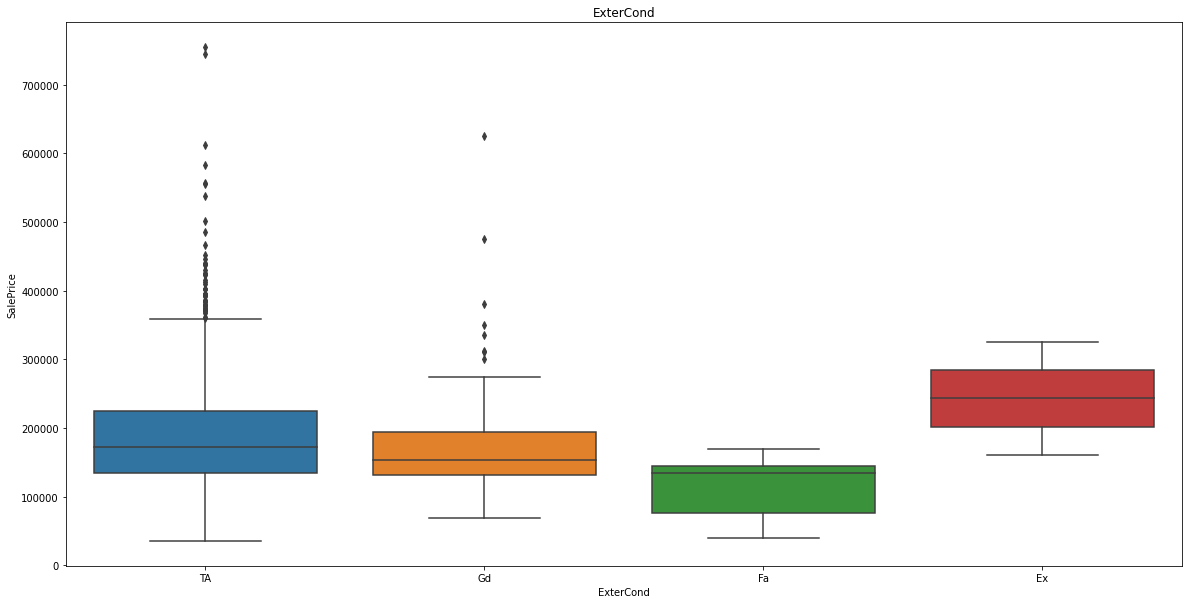

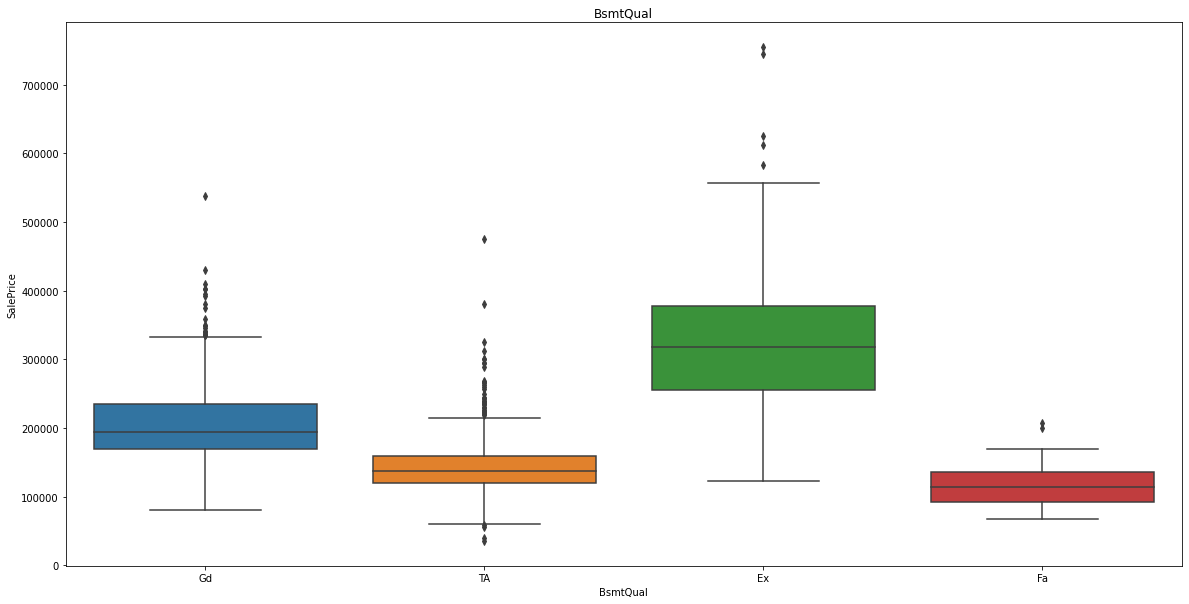

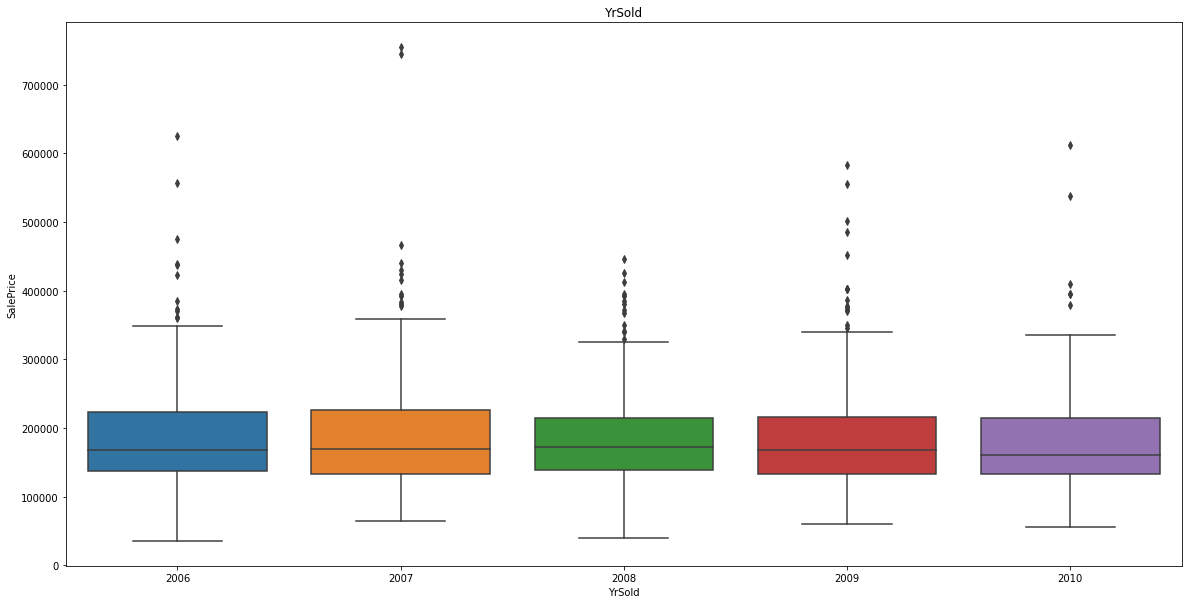

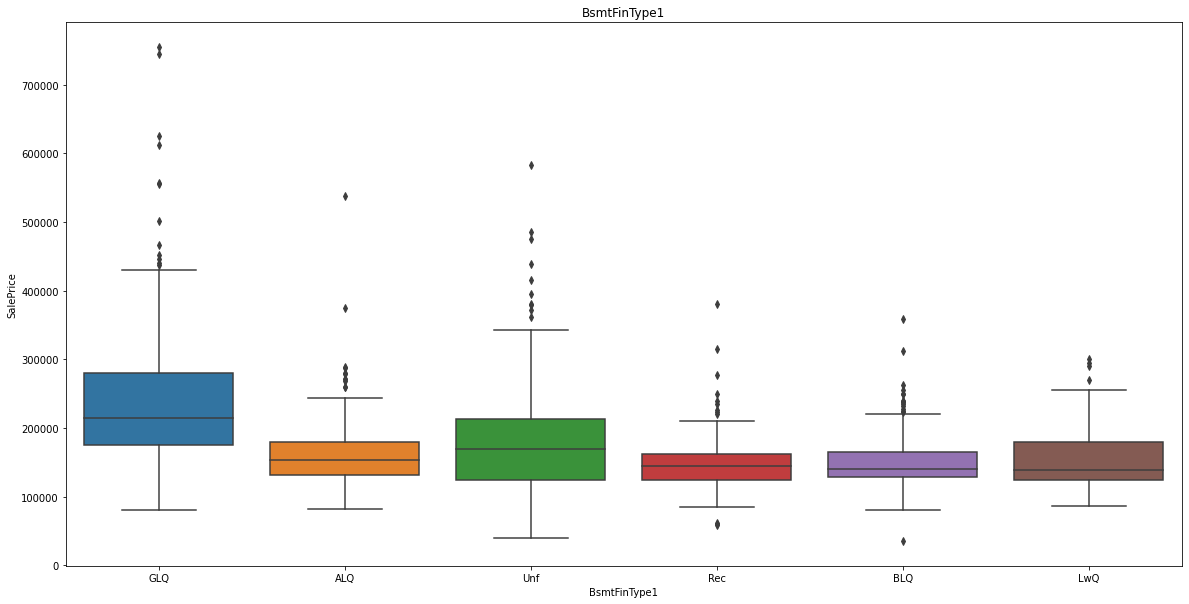

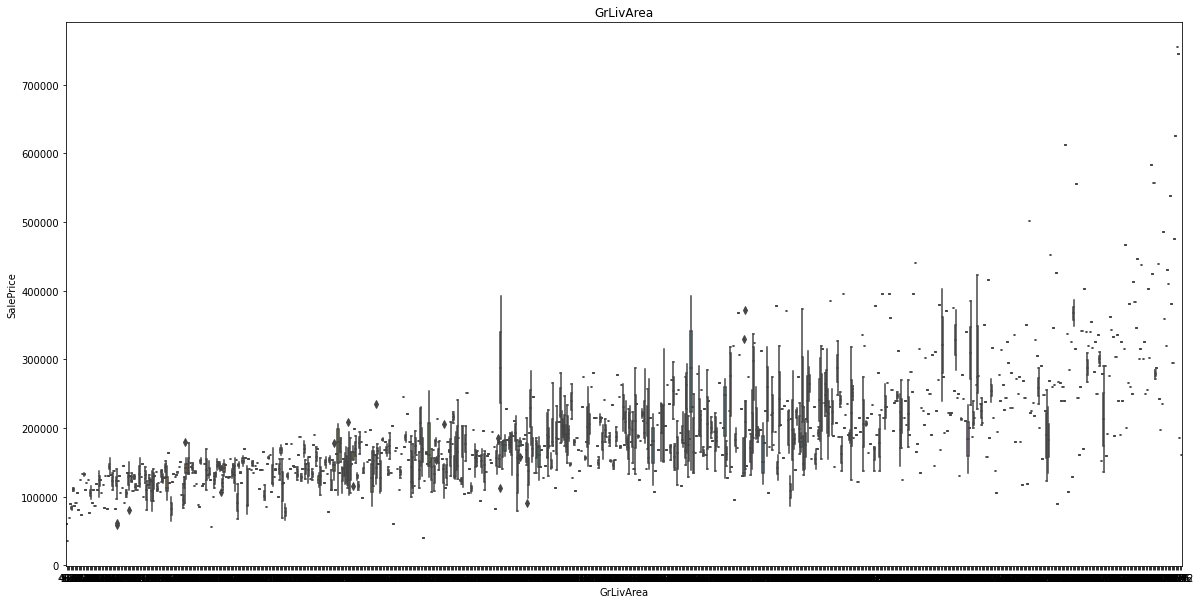

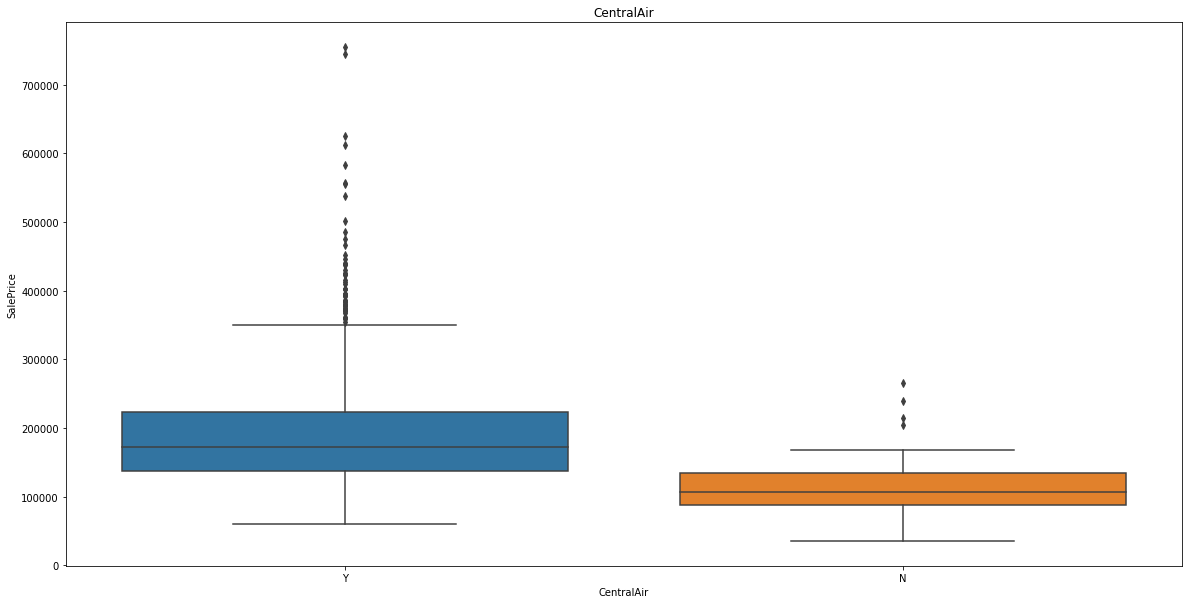

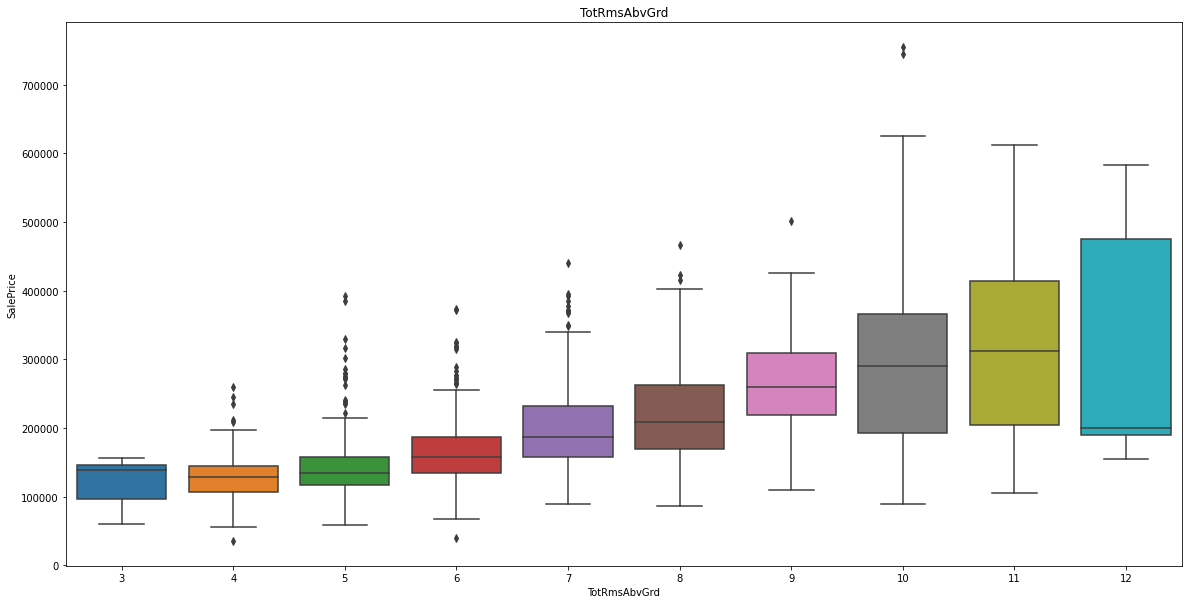

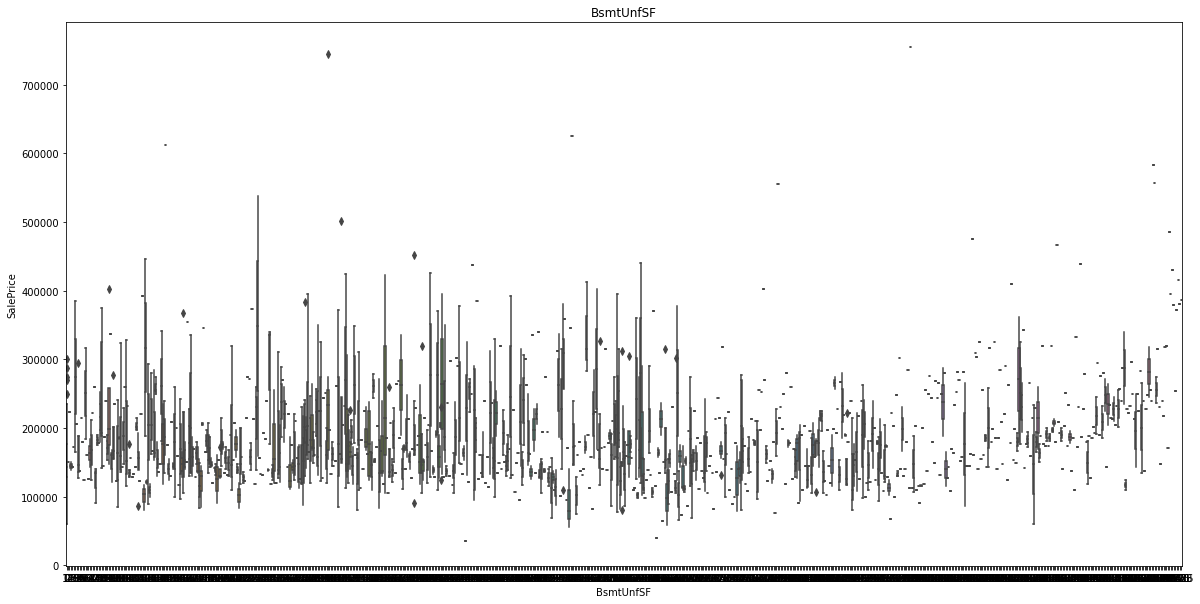

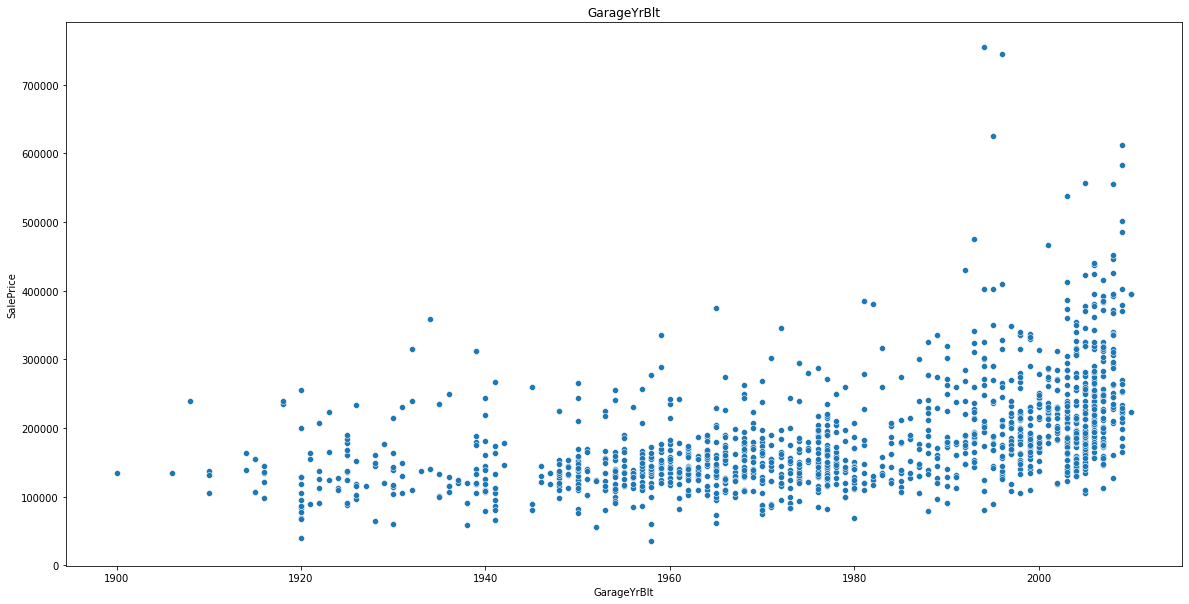

In [102]:
final_columns = set( list(df_train.isna().sum().sort_values(ascending=False).index) ) - set(list(df_train.isna().sum().sort_values(ascending=False).index)[0:5])
df_final_train = df_train[final_columns]
df_fill_train = df_final_train.interpolate(method="linear")
df_drop_train = df_fill_train.dropna()

df_data = df_drop_train
df_data = df_data.set_index("Id")

import seaborn as sns

for c in df_data.columns:
  if c != "SalePrice":
    type_str = str(df_data[[c]].dtypes[0])

    if type_str in ["int64", "object"]:
      fig, ax = plt.subplots()
      fig.set_size_inches([20,10])
      ax = sns.boxplot(x=c, y="SalePrice", data=df_data)
      ax.set_title(c)
      plt.show()
    else:
      fig, ax = plt.subplots()
      fig.set_size_inches([20,10])
      ax = sns.scatterplot(x=c, y="SalePrice", data=df_data)
      ax.set_title(c)
      plt.show()

### Manipulamos las cosas.

In [23]:
df_fill_train = df_final_train.interpolate(method="linear")
df_drop_train = df_fill_train.dropna()
#df_final_train = df_final_train[ set(df_final_train.columns) - set(['Id']) ]

In [24]:
#df_final_train = df_drop_train[ set(df_drop_train.columns) - set(['Id']) ]
df_drop_train.columns
df_drop_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BsmtFinSF2     1338 non-null   int64  
 1   KitchenQual    1338 non-null   object 
 2   MiscVal        1338 non-null   int64  
 3   Condition2     1338 non-null   object 
 4   SaleType       1338 non-null   object 
 5   Foundation     1338 non-null   object 
 6   OverallQual    1338 non-null   int64  
 7   LandSlope      1338 non-null   object 
 8   3SsnPorch      1338 non-null   int64  
 9   ExterQual      1338 non-null   object 
 10  OpenPorchSF    1338 non-null   int64  
 11  GarageQual     1338 non-null   object 
 12  KitchenAbvGr   1338 non-null   int64  
 13  GarageCars     1338 non-null   int64  
 14  ScreenPorch    1338 non-null   int64  
 15  LotArea        1338 non-null   int64  
 16  TotalBsmtSF    1338 non-null   int64  
 17  MasVnrType     1338 non-null   object 
 18  GarageAr

In [25]:
df_data = df_drop_train
df_data = df_data.set_index("Id")
df_data_dummie = pd.get_dummies(df_data)

In [26]:
from sklearn.linear_model import LinearRegression

Y = df_data_dummie["SalePrice"]
X = df_data_dummie.loc[:, df_data_dummie.columns != 'SalePrice']

In [27]:
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.9283872861131248

## Vamos a hacer el testeo. 

### Con Scik learn 

In [59]:
df_final_test = df_test[set(list(final_columns)) - set(['SalePrice'])]
df_final_test = df_final_test.interpolate(method="linear")
#df_final_test = df_final_test.dropna()
df_final_test = pd.get_dummies(df_final_test).set_index("Id")

df_final_test.shape

#Hay casas donde no tienen ciertas variables. Las llenamos con puros 0's
faltantes = set(X.columns) - set(df_final_test.columns) 
n = df_final_test.shape[0]
for falta in faltantes:
  df_final_test[falta] = np.zeros(n)

In [63]:
X_predict = df_final_test[X.columns]

In [65]:
Y_predict = reg.predict(X_predict)

In [70]:
data = {"Id": X_predict.index, "SalePrice": abs(Y_predict)}
result = pd.DataFrame(data)

In [72]:
result.to_csv("kaggle_results_houseprice.csv", index=False)

Text(0.5, 1.0, 'ENTRENAMIENTOb')

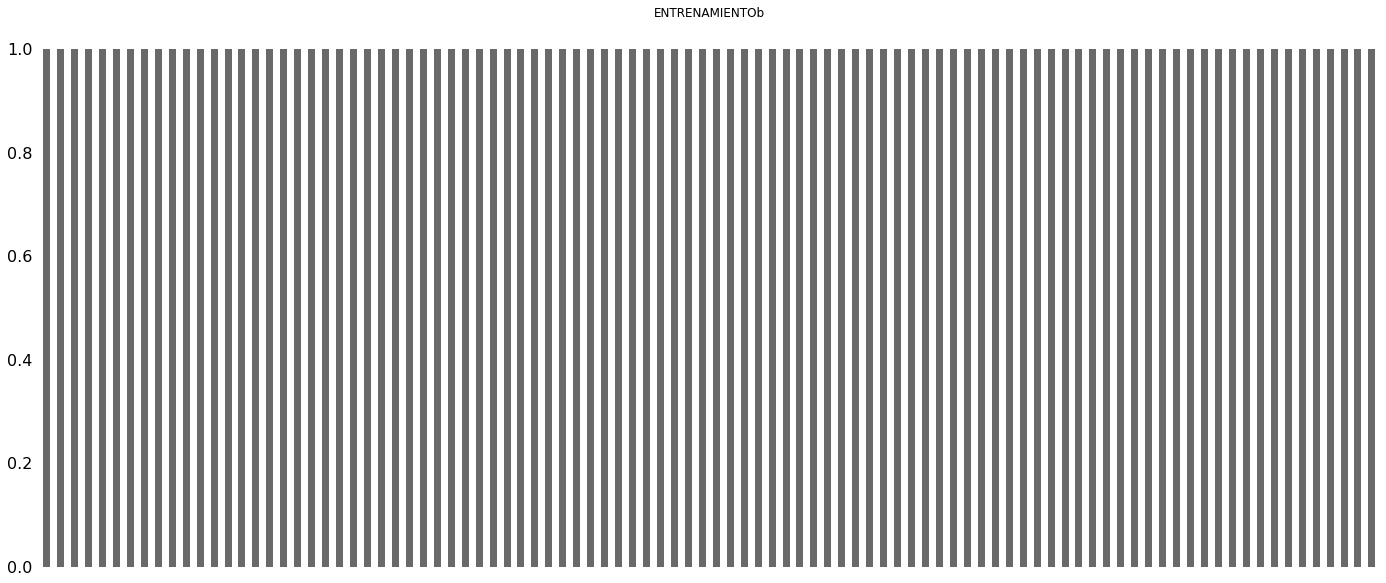

In [44]:
null_var = list(df_final_test.isna().sum().sort_values(ascending=False).index)[0:40]
#plt.plot(df_test.isna().sum().sort_values(ascending=False))
#df_test.isna().sum().sort_values(ascending=False).head(40)

df_faltantes = df_final_test[null_var]


msno.bar(df_final_test)
plt.title("ENTRENAMIENTOb")

### Con Stats

In [3]:
import statsmodels.api as sm

sm.OLS()